# Examen Topología
### Caso Práctico

Fedra Fernanda Mandujano López // A00835797



#### Planteamiento del problema 

Mario Kart Deluxe 8 es un videojuego de carreras de karts desarrollado y publicado por Nintendo para la consola Nintendo Switch. El juego es una versión mejorada del Mario Kart 8 lanzado originalmente para la consola Wii U. En Mario Kart Deluxe 8, los jugadores pueden elegir entre una variedad de personajes y vehículos, y competir en diferentes pistas de carreras. El juego incluye una amplia gama de modos de juego, como carreras individuales, carreras en equipo y batallas. Además, cuenta con una gran cantidad de contenido descargable que agrega nuevas pistas, personajes y vehículos al juego.

El problema a resolver es encontrar buenas combinaciones que aseguren ventaja en una carrera para tener mayores oportunidades de ganar, este problema ocupa utilzar diferentes métodos estadísticos debido a la gran cantidad de combinaciones posible

### Carga de Datos

In [170]:
#%pip install kagglehub
#%pip install seaborn
#%pip install yellowbrick
#%pip install umap-learn
#%pip install kmapper

In [171]:
import pandas as pd
import numpy as np
import os
import sys
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance



In [172]:
# Download latest version
path = kagglehub.dataset_download("marlowspringmeier/mario-kart-8-deluxe-ingame-statistics")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\fedra\.cache\kagglehub\datasets\marlowspringmeier\mario-kart-8-deluxe-ingame-statistics\versions\2


In [173]:
# body karts
body = pd.read_csv("C:/Users/fedra/.cache/kagglehub/datasets/marlowspringmeier/mario-kart-8-deluxe-ingame-statistics/versions/2/bodies_karts.csv")
body

,Body;Weight;Acceleration;On-Road traction;Off-Road Traction;Mini-Turbo;Ground Speed;Water Speed;Anti-Gravity Speed;Air Speed;Ground Handling;Water Handling;Anti-Gravity Handling;Air Handling
0,Standard Kart;2;4;3;3;4;3;3;3;3;3;2;3;3
1,Pipe Frame;1;6;3;4;6;1;3;1;1;5;4;4;2
2,Mach 8;3;3;2;4;4;3;3;5;4;2;2;4;2
3,Steel Driver;4;1;1;3;2;4;5;2;0;1;5;1;1
4,Cat Cruiser;2;5;4;3;5;2;2;3;4;4;2;3;4
5,Circuit Special;3;1;3;1;1;5;1;4;2;1;1;2;0
6,Tri-Speeder;4;1;1;3;2;4;5;2;0;1;5;1;1
7,Badwagon;4;0;2;5;0;5;2;3;1;0;1;1;0
8,Prancer;1;2;1;2;3;4;3;3;3;3;3;2;3
9,Biddybuggy;0;7;1;4;7;0;1;2;1;5;4;5;4


In [174]:
#drivers 
drivers = pd.read_csv("C:/Users/fedra/.cache/kagglehub/datasets/marlowspringmeier/mario-kart-8-deluxe-ingame-statistics/versions/2/drivers.csv")
drivers

,Driver;Weight;Acceleration;On-Road traction;Off-Road Traction;Mini-Turbo;Ground Speed;Water Speed;Anti-Gravity Speed;Air Speed;Ground Handling;Water Handling;Anti-Gravity Handling;Air Handling
0,Mario;6;2;4;2;2;6;6;6;6;4;4;4;4
1,Luigi;6;2;5;1;2;6;6;6;6;5;5;5;5
2,Peach;4;3;3;3;3;5;5;5;5;5;5;5;5
3,Daisy;4;3;3;3;3;5;5;5;5;5;5;5;5
4,Yoshi;4;3;3;3;3;5;5;5;5;5;5;5;5
5,Toad;3;4;3;4;3;3;3;3;3;7;7;7;7
6,Toadette;2;5;4;2;4;2;2;2;2;7;7;7;7
7,Koopa Troopa;2;4;1;5;4;2;2;2;2;8;8;8;8
8,Bowser;10;0;6;0;0;10;10;10;10;0;0;0;0
9,Donkey Kong;8;1;10;0;1;9;9;9;9;2;2;2;2


In [175]:
# Gliders
gliders = pd.read_csv("C:/Users/fedra/.cache/kagglehub/datasets/marlowspringmeier/mario-kart-8-deluxe-ingame-statistics/versions/2/gliders.csv")
gliders

,Glider;Weight;Acceleration;On-Road traction;Off-Road Traction;Mini-Turbo;Ground Speed;Water Speed;Anti-Gravity Speed;Air Speed;Ground Handling;Water Handling;Anti-Gravity Handling;Air Handling
0,Super Glider;1;1;1;1;1;1;1;0;2;1;0;1;1
1,Cloud Glider;0;2;1;1;2;0;1;1;1;1;0;1;2
2,Wario Wing ;2;1;2;0;1;1;0;1;2;1;1;0;1
3,Waddle Wing;1;1;1;1;1;1;1;0;2;1;0;1;1
4,Peach Parasol;1;2;2;0;2;0;0;1;1;1;1;0;2
5,Parachute;0;2;1;1;2;0;1;1;1;1;0;1;2
6,Parafoil;1;2;2;0;2;0;0;1;1;1;1;0;2
7,Flower Glider ;0;2;1;1;2;0;1;1;1;1;0;1;2
8,Bowser Kite;1;2;2;0;2;0;0;1;1;1;1;0;2
9,Plane Glider ;2;1;2;0;1;1;0;1;2;1;1;0;1


In [176]:
# tires
tires = pd.read_csv("C:/Users/fedra/.cache/kagglehub/datasets/marlowspringmeier/mario-kart-8-deluxe-ingame-statistics/versions/2/tires.csv")
tires

,Tire;Weight;Acceleration;On-Road traction;Off-Road Traction;Mini-Turbo;Ground Speed;Water Speed;Anti-Gravity Speed;Air Speed;Ground Handling;Water Handling;Anti-Gravity Handling;Air Handling
0,Standard;2;4;2;5;3;2;3;2;3;3;3;3;3
1,Monster;4;2;3;7;2;2;2;2;1;0;1;0;1
2,Roller;0;6;0;4;6;0;3;0;3;4;4;4;4
3,Slim;2;2;4;1;2;3;2;4;2;4;4;3;4
4,Slick;3;1;4;0;0;4;0;4;0;2;0;2;1
5,Metal;4;0;1;2;0;4;3;1;2;2;2;1;0
6,Button;0;5;1;3;5;1;2;2;2;3;3;4;2
7,Off-Road;3;3;3;6;1;3;4;2;1;1;1;2;2
8,Sponge;1;4;2;6;4;1;1;1;4;2;1;2;3
9,Wood;2;2;4;1;2;3;2;4;2;4;4;3;4


### Preparación de datos

La preparación de datos es importante puesto que el formato en el que está estas bases de datos impiden analizar de manera fluida los datos

In [177]:
colums_karts=['Body','Weight','Acceleration','On-road Traction', 'Off-road Traction', 'MiniTurbo', 'Ground Speed', 'Water Speed', 'Anti-gravity Speed', 'Air Speed', 'Ground Handling','Water Handling', 'Anti-gravity Handling','Air Handling']

colums_drivers=['Driver','Weight','Acceleration','On-road Traction', 'Off-road Traction', 'MiniTurbo', 'Ground Speed', 'Water Speed', 'Anti-gravity Speed', 'Air Speed', 'Ground Handling','Water Handling', 'Anti-gravity Handling','Air Handling']

colums_gliders=['Gliders','Weight','Acceleration','On-road Traction', 'Off-road Traction', 'MiniTurbo', 'Ground Speed', 'Water Speed', 'Anti-gravity Speed', 'Air Speed', 'Ground Handling','Water Handling', 'Anti-gravity Handling','Air Handling']

colums_tires=['Tires','Weight','Acceleration','On-road Traction', 'Off-road Traction', 'MiniTurbo', 'Ground Speed', 'Water Speed', 'Anti-gravity Speed', 'Air Speed', 'Ground Handling','Water Handling', 'Anti-gravity Handling','Air Handling']


In [178]:
# Split the single column into multiple columns using ';' as a delimiter
body = body.iloc[:, 0].str.split(';', expand=True)
body.columns = colums_karts
body


,Body,Weight,Acceleration,On-road Traction,Off-road Traction,MiniTurbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
0,Standard Kart,2,4,3,3,4,3,3,3,3,3,2,3,3
1,Pipe Frame,1,6,3,4,6,1,3,1,1,5,4,4,2
2,Mach 8,3,3,2,4,4,3,3,5,4,2,2,4,2
3,Steel Driver,4,1,1,3,2,4,5,2,0,1,5,1,1
4,Cat Cruiser,2,5,4,3,5,2,2,3,4,4,2,3,4
5,Circuit Special,3,1,3,1,1,5,1,4,2,1,1,2,0
6,Tri-Speeder,4,1,1,3,2,4,5,2,0,1,5,1,1
7,Badwagon,4,0,2,5,0,5,2,3,1,0,1,1,0
8,Prancer,1,2,1,2,3,4,3,3,3,3,3,2,3
9,Biddybuggy,0,7,1,4,7,0,1,2,1,5,4,5,4


In [179]:
# Split the single column into multiple columns using ';' as a delimiter
gliders = gliders.iloc[:, 0].str.split(';', expand=True)
gliders.columns = colums_gliders
gliders

,Gliders,Weight,Acceleration,On-road Traction,Off-road Traction,MiniTurbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
0,Super Glider,1,1,1,1,1,1,1,0,2,1,0,1,1
1,Cloud Glider,0,2,1,1,2,0,1,1,1,1,0,1,2
2,Wario Wing,2,1,2,0,1,1,0,1,2,1,1,0,1
3,Waddle Wing,1,1,1,1,1,1,1,0,2,1,0,1,1
4,Peach Parasol,1,2,2,0,2,0,0,1,1,1,1,0,2
5,Parachute,0,2,1,1,2,0,1,1,1,1,0,1,2
6,Parafoil,1,2,2,0,2,0,0,1,1,1,1,0,2
7,Flower Glider,0,2,1,1,2,0,1,1,1,1,0,1,2
8,Bowser Kite,1,2,2,0,2,0,0,1,1,1,1,0,2
9,Plane Glider,2,1,2,0,1,1,0,1,2,1,1,0,1


In [180]:
# Split the single column into multiple columns using ';' as a delimiter
drivers = drivers.iloc[:, 0].str.split(';', expand=True)
drivers.columns = colums_drivers
drivers


,Driver,Weight,Acceleration,On-road Traction,Off-road Traction,MiniTurbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
0,Mario,6,2,4,2,2,6,6,6,6,4,4,4,4
1,Luigi,6,2,5,1,2,6,6,6,6,5,5,5,5
2,Peach,4,3,3,3,3,5,5,5,5,5,5,5,5
3,Daisy,4,3,3,3,3,5,5,5,5,5,5,5,5
4,Yoshi,4,3,3,3,3,5,5,5,5,5,5,5,5
5,Toad,3,4,3,4,3,3,3,3,3,7,7,7,7
6,Toadette,2,5,4,2,4,2,2,2,2,7,7,7,7
7,Koopa Troopa,2,4,1,5,4,2,2,2,2,8,8,8,8
8,Bowser,10,0,6,0,0,10,10,10,10,0,0,0,0
9,Donkey Kong,8,1,10,0,1,9,9,9,9,2,2,2,2


In [181]:
# Split the single column into multiple columns using ';' as a delimiter
tires = tires.iloc[:, 0].str.split(';', expand=True)
tires.columns = colums_tires
tires


,Tires,Weight,Acceleration,On-road Traction,Off-road Traction,MiniTurbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
0,Standard,2,4,2,5,3,2,3,2,3,3,3,3,3
1,Monster,4,2,3,7,2,2,2,2,1,0,1,0,1
2,Roller,0,6,0,4,6,0,3,0,3,4,4,4,4
3,Slim,2,2,4,1,2,3,2,4,2,4,4,3,4
4,Slick,3,1,4,0,0,4,0,4,0,2,0,2,1
5,Metal,4,0,1,2,0,4,3,1,2,2,2,1,0
6,Button,0,5,1,3,5,1,2,2,2,3,3,4,2
7,Off-Road,3,3,3,6,1,3,4,2,1,1,1,2,2
8,Sponge,1,4,2,6,4,1,1,1,4,2,1,2,3
9,Wood,2,2,4,1,2,3,2,4,2,4,4,3,4


In [182]:
# Convertir las columnas a tipo numérico
body[colums_karts[1:]] = body[colums_karts[1:]].apply(pd.to_numeric, errors='coerce')
gliders[colums_gliders[1:]] = gliders[colums_gliders[1:]].apply(pd.to_numeric, errors='coerce')
drivers[colums_drivers[1:]] = drivers[colums_drivers[1:]].apply(pd.to_numeric, errors='coerce')
tires[colums_tires[1:]] = tires[colums_tires[1:]].apply(pd.to_numeric, errors='coerce')


#### Sin datos faltantes

In [183]:
# Total de datos nulos en cada dataframe
print("Total de datos nulos en body_karts:", body.isnull().sum().sum())
print("Total de datos nulos en gliders:", gliders.isnull().sum().sum())
print("Total de datos nulos en drivers:", drivers.isnull().sum().sum())
print("Total de datos nulos en tires:", tires.isnull().sum().sum())


Total de datos nulos en body_karts: 0
Total de datos nulos en gliders: 0
Total de datos nulos en drivers: 0
Total de datos nulos en tires: 0


#### Sin Datos repetidos

In [184]:
# Datos repetidos en cada dataframe
print("Datos repetidos en body_karts:", body.duplicated().sum())
print("Datos repetidos en gliders:", gliders.duplicated().sum())
print("Datos repetidos en drivers:", drivers.duplicated().sum())
print("Datos repetidos en tires:", tires.duplicated().sum())

Datos repetidos en body_karts: 0
Datos repetidos en gliders: 0
Datos repetidos en drivers: 0
Datos repetidos en tires: 0


#### Datos únicos

In [185]:
# Datos únicos en cada dataframe
print("Datos únicos en body_karts:", body.nunique())
print("Datos únicos en gliders:", gliders.nunique())
print("Datos únicos en drivers:", drivers.nunique())
print("Datos únicos en tires:", tires.nunique())

Datos únicos en body_karts: Body                     40
Weight                    5
Acceleration              8
On-road Traction          5
Off-road Traction         8
MiniTurbo                 8
Ground Speed              6
Water Speed               5
Anti-gravity Speed        6
Air Speed                 5
Ground Handling           6
Water Handling            5
Anti-gravity Handling     5
Air Handling              5
dtype: int64
Datos únicos en gliders: Gliders                  14
Weight                    3
Acceleration              2
On-road Traction          2
Off-road Traction         2
MiniTurbo                 2
Ground Speed              2
Water Speed               2
Anti-gravity Speed        2
Air Speed                 2
Ground Handling           1
Water Handling            2
Anti-gravity Handling     2
Air Handling              2
dtype: int64
Datos únicos en drivers: Driver                   43
Weight                   11
Acceleration              6
On-road Traction         10


#### Para reducir dimensionalidad se agruparán caracterísiticas

Esto hará que los modelos a emplear, e incluso el análisis en sí, se vuelva más fácil de realizar

In [186]:
caracteristics = colums_tires[1:]
caracteristics

['Weight',
 'Acceleration',
 'On-road Traction',
 'Off-road Traction',
 'MiniTurbo',
 'Ground Speed',
 'Water Speed',
 'Anti-gravity Speed',
 'Air Speed',
 'Ground Handling',
 'Water Handling',
 'Anti-gravity Handling',
 'Air Handling']

-  Total_traction= On-Road traction + Off-Road Traction 
-  Total_speed= Ground Speed + Water Speed + Anti-Gravity Speed + Air Speed
-  Total_handlig = Ground Handling + Water Handling + Anti-Gravity Handling + Air Handling

In [187]:
tires1=tires.copy()
body_karts=body.copy()
drivers1=drivers.copy()
gliders1=gliders.copy()


In [188]:
# Sumar On-road Traction, Off-road Traction y haz una nueva columna llamada Traction
tires1['Traction'] = tires1['On-road Traction'] + tires1['Off-road Traction']
body_karts['Traction'] = body_karts['On-road Traction'] + body_karts['Off-road Traction']
drivers1['Traction'] = drivers1['On-road Traction'] + drivers1['Off-road Traction']
gliders1['Traction'] = gliders1['On-road Traction'] + gliders1['Off-road Traction']


In [189]:
# Elimina las columnas On-road Traction y Off-road Traction
tires1 = tires1.drop(columns=['On-road Traction', 'Off-road Traction'])
body_karts = body_karts.drop(columns=['On-road Traction', 'Off-road Traction'])
drivers1 = drivers1.drop(columns=['On-road Traction', 'Off-road Traction'])
gliders1 = gliders1.drop(columns=['On-road Traction', 'Off-road Traction'])


In [190]:
# Sumar Ground speed, Water speed, Anti-gravity speed, Air speed y haz una nueva columna llamada Speed
tires1['Speed'] = tires1['Ground Speed'] + tires1['Water Speed'] + tires1['Anti-gravity Speed'] + tires['Air Speed']
body_karts['Speed'] = body_karts['Ground Speed'] + body_karts['Water Speed'] + body_karts['Anti-gravity Speed'] + body_karts['Air Speed']
drivers1['Speed'] = drivers1['Ground Speed'] + drivers1['Water Speed'] + drivers1['Anti-gravity Speed'] + drivers1['Air Speed']
gliders1['Speed'] = gliders1['Ground Speed'] + gliders1['Water Speed'] + gliders1['Anti-gravity Speed'] + gliders1['Air Speed']


In [191]:
# Elimina Ground Speed, Water Speed, Anti-gravity Speed y Air Speed
tires1 = tires1.drop(columns=['Ground Speed', 'Water Speed', 'Anti-gravity Speed', 'Air Speed'])
body_karts = body_karts.drop(columns=['Ground Speed', 'Water Speed', 'Anti-gravity Speed', 'Air Speed'])
drivers1 = drivers1.drop(columns=['Ground Speed', 'Water Speed', 'Anti-gravity Speed', 'Air Speed'])
gliders1 = gliders1.drop(columns=['Ground Speed', 'Water Speed', 'Anti-gravity Speed', 'Air Speed'])


In [192]:
# Sumar Ground Handling, Water Handling, Anti-gravity Handling, Air Handling y haz una nueva columna llamada Handling
tires1['Handling'] = tires1['Ground Handling'] + tires1['Water Handling'] + tires1['Anti-gravity Handling'] + tires1['Air Handling']
body_karts['Handling'] = body_karts['Ground Handling'] + body_karts['Water Handling'] + body_karts['Anti-gravity Handling'] + body_karts['Air Handling']
drivers1['Handling'] = drivers1['Ground Handling'] + drivers1['Water Handling'] + drivers1['Anti-gravity Handling'] + drivers1['Air Handling']
gliders1['Handling'] = gliders1['Ground Handling'] + gliders1['Water Handling'] + gliders1['Anti-gravity Handling'] + gliders1['Air Handling']

In [193]:
# Elimina las columnas Ground Handling, Water Handling, Anti-gravity Handling y Air Handling
tires1 = tires1.drop(columns=['Ground Handling', 'Water Handling', 'Anti-gravity Handling', 'Air Handling'])
body_karts = body_karts.drop(columns=['Ground Handling', 'Water Handling', 'Anti-gravity Handling', 'Air Handling'])
drivers1 = drivers1.drop(columns=['Ground Handling', 'Water Handling', 'Anti-gravity Handling', 'Air Handling'])
gliders1 = gliders1.drop(columns=['Ground Handling', 'Water Handling', 'Anti-gravity Handling', 'Air Handling'])


In [194]:
tires1.head(5)

,Tires,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Standard,2,4,3,7,10,12
1,Monster,4,2,2,10,7,2
2,Roller,0,6,6,4,6,16
3,Slim,2,2,2,5,11,15
4,Slick,3,1,0,4,8,5


In [195]:
gliders1.head(5)

,Gliders,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Super Glider,1,1,1,2,4,3
1,Cloud Glider,0,2,2,2,3,4
2,Wario Wing,2,1,1,2,4,3
3,Waddle Wing,1,1,1,2,4,3
4,Peach Parasol,1,2,2,2,2,4


In [196]:
drivers1.head(5)

,Driver,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Mario,6,2,2,6,24,16
1,Luigi,6,2,2,6,24,20
2,Peach,4,3,3,6,20,20
3,Daisy,4,3,3,6,20,20
4,Yoshi,4,3,3,6,20,20


In [197]:
body_karts.head(5)

,Body,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Standard Kart,2,4,4,6,12,11
1,Pipe Frame,1,6,6,7,6,15
2,Mach 8,3,3,4,6,15,10
3,Steel Driver,4,1,2,4,11,8
4,Cat Cruiser,2,5,5,7,11,13


#### Creación de grupos

In [198]:
features = ['Weight', 'Acceleration', 'Traction', 'Speed', 'Handling', 'MiniTurbo']

In [199]:
df_bodies = body_karts.sort_values(by=features, ignore_index=True)
df_bodies

,Body,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Blue Falcon,0,3,3,4,13,11
1,Splat Buggy,0,3,3,4,13,11
2,Landship,0,6,6,6,8,14
3,Streetle,0,6,6,6,8,14
4,Biddybuggy,0,7,7,5,4,18
5,Mr. Scooty,0,7,7,5,4,18
6,Prancer,1,2,3,3,13,11
7,Sport Bike,1,2,3,3,13,11
8,Jet Bike,1,2,3,3,13,11
9,Standard Bike,1,5,5,8,11,14


In [200]:
df_gliders = gliders1.sort_values(by=features, ignore_index=True)
df_gliders

,Gliders,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Cloud Glider,0,2,2,2,3,4
1,Parachute,0,2,2,2,3,4
2,Flower Glider,0,2,2,2,3,4
3,Paper Glider,0,2,2,2,3,4
4,Super Glider,1,1,1,2,4,3
5,Waddle Wing,1,1,1,2,4,3
6,Hylian Kite,1,1,1,2,4,3
7,Peach Parasol,1,2,2,2,2,4
8,Parafoil,1,2,2,2,2,4
9,Bowser Kite,1,2,2,2,2,4


In [201]:
# Valores únicos en cada dataframe
print("Valores únicos en gliders:", gliders1.nunique())

Valores únicos en gliders: Gliders         14
Weight           3
Acceleration     2
MiniTurbo        2
Traction         1
Speed            3
Handling         2
dtype: int64


In [202]:
df_drivers = drivers1.sort_values(by=features, ignore_index=True)
df_drivers

,Driver,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Baby Peach,0,4,5,8,0,40
1,Baby Daisy,0,4,5,8,0,40
2,Baby Rosalina,0,5,5,7,0,36
3,Lemmy,0,5,5,7,0,36
4,Baby Mario,1,5,4,6,4,32
5,Baby Luigi,1,5,4,6,4,32
6,Dry Bones,1,5,4,6,4,32
7,Koopa Troopa,2,4,4,6,8,32
8,Lakitu,2,4,4,6,8,32
9,Bowser Jr.,2,4,4,6,8,32


In [203]:
df_tires = tires1.sort_values(by=features, ignore_index=True)
df_tires

,Tires,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Button,0,5,5,4,7,12
1,Leaf Tires,0,5,5,4,7,12
2,Roller,0,6,6,4,6,16
3,Azure Roller,0,6,6,4,6,16
4,Sponge,1,4,4,8,7,8
5,Cushion,1,4,4,8,7,8
6,Slim,2,2,2,5,11,15
7,Wood,2,2,2,5,11,15
8,Crimson Slim,2,2,2,5,11,15
9,Standard,2,4,3,7,10,12


In [204]:
df_bodies['Group'] = df_bodies.groupby(features)['Body'].transform(lambda names: '-'.join(sorted(names.unique())))
df_bodies

,Body,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling,Group
0,Blue Falcon,0,3,3,4,13,11,Blue Falcon-Splat Buggy
1,Splat Buggy,0,3,3,4,13,11,Blue Falcon-Splat Buggy
2,Landship,0,6,6,6,8,14,Landship-Streetle
3,Streetle,0,6,6,6,8,14,Landship-Streetle
4,Biddybuggy,0,7,7,5,4,18,Biddybuggy-Mr. Scooty
5,Mr. Scooty,0,7,7,5,4,18,Biddybuggy-Mr. Scooty
6,Prancer,1,2,3,3,13,11,Jet Bike-Prancer-Sport Bike
7,Sport Bike,1,2,3,3,13,11,Jet Bike-Prancer-Sport Bike
8,Jet Bike,1,2,3,3,13,11,Jet Bike-Prancer-Sport Bike
9,Standard Bike,1,5,5,8,11,14,Flame Rider-Standard Bike-W 25 Silver Arrow-Wi...


In [205]:
df_drivers['Group'] = df_drivers.groupby(features)['Driver'].transform(lambda names: '-'.join(sorted(names.unique())))
df_drivers


,Driver,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling,Group
0,Baby Peach,0,4,5,8,0,40,Baby Daisy-Baby Peach
1,Baby Daisy,0,4,5,8,0,40,Baby Daisy-Baby Peach
2,Baby Rosalina,0,5,5,7,0,36,Baby Rosalina-Lemmy
3,Lemmy,0,5,5,7,0,36,Baby Rosalina-Lemmy
4,Baby Mario,1,5,4,6,4,32,Baby Luigi-Baby Mario-Dry Bones
5,Baby Luigi,1,5,4,6,4,32,Baby Luigi-Baby Mario-Dry Bones
6,Dry Bones,1,5,4,6,4,32,Baby Luigi-Baby Mario-Dry Bones
7,Koopa Troopa,2,4,4,6,8,32,Bowser Jr.-Koopa Troopa-Lakitu
8,Lakitu,2,4,4,6,8,32,Bowser Jr.-Koopa Troopa-Lakitu
9,Bowser Jr.,2,4,4,6,8,32,Bowser Jr.-Koopa Troopa-Lakitu


In [206]:
df_gliders['Group'] = df_gliders.groupby(features)['Gliders'].transform(lambda names: '-'.join(sorted(names.unique())))
df_gliders

,Gliders,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling,Group
0,Cloud Glider,0,2,2,2,3,4,Cloud Glider-Flower Glider -Paper Glider-Para...
1,Parachute,0,2,2,2,3,4,Cloud Glider-Flower Glider -Paper Glider-Para...
2,Flower Glider,0,2,2,2,3,4,Cloud Glider-Flower Glider -Paper Glider-Para...
3,Paper Glider,0,2,2,2,3,4,Cloud Glider-Flower Glider -Paper Glider-Para...
4,Super Glider,1,1,1,2,4,3,Hylian Kite-Super Glider-Waddle Wing
5,Waddle Wing,1,1,1,2,4,3,Hylian Kite-Super Glider-Waddle Wing
6,Hylian Kite,1,1,1,2,4,3,Hylian Kite-Super Glider-Waddle Wing
7,Peach Parasol,1,2,2,2,2,4,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol
8,Parafoil,1,2,2,2,2,4,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol
9,Bowser Kite,1,2,2,2,2,4,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol


In [207]:
df_tires['Group'] = df_tires.groupby(features)['Tires'].transform(lambda names: '-'.join(sorted(names.unique())))
df_tires


,Tires,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling,Group
0,Button,0,5,5,4,7,12,Button-Leaf Tires
1,Leaf Tires,0,5,5,4,7,12,Button-Leaf Tires
2,Roller,0,6,6,4,6,16,Azure Roller-Roller
3,Azure Roller,0,6,6,4,6,16,Azure Roller-Roller
4,Sponge,1,4,4,8,7,8,Cushion-Sponge
5,Cushion,1,4,4,8,7,8,Cushion-Sponge
6,Slim,2,2,2,5,11,15,Crimson Slim-Slim-Wood
7,Wood,2,2,2,5,11,15,Crimson Slim-Slim-Wood
8,Crimson Slim,2,2,2,5,11,15,Crimson Slim-Slim-Wood
9,Standard,2,4,3,7,10,12,Blue Standard-GLA Tires-Standard


##### Grupos creados

In [208]:
# Elimina la columna Body
bodies_grouped = df_bodies.drop(columns=['Body'])
# Elimina duplicados
bodies_grouped = bodies_grouped.drop_duplicates(subset=['Group'])
# Colocar la columna Group al principio
bodies_grouped = bodies_grouped[['Group'] + [col for col in bodies_grouped.columns if col != 'Group']]
# Cambiar el nombre de la columna Group a Body
bodies_grouped = bodies_grouped.rename(columns={'Group': 'Body'})
bodies_grouped

,Body,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Blue Falcon-Splat Buggy,0,3,3,4,13,11
2,Landship-Streetle,0,6,6,6,8,14
4,Biddybuggy-Mr. Scooty,0,7,7,5,4,18
6,Jet Bike-Prancer-Sport Bike,1,2,3,3,13,11
9,Flame Rider-Standard Bike-W 25 Silver Arrow-Wi...,1,5,5,8,11,14
13,City Tripper-Pipe Frame-Varmint,1,6,6,7,6,15
16,Gold Standard-Master Cycle-Sneeker,2,2,3,1,12,10
19,300 SL Roadster-Standard Kart-The Duke,2,4,4,6,12,11
22,Cat Cruiser-Comet-Teddy Buggy-Yoshi Bike,2,5,5,7,11,13
26,B Dasher-Circuit Special-P-Wing,3,1,1,4,12,4


Se puede ver que mientras mpas aceleración tenga el body menor peso necesita

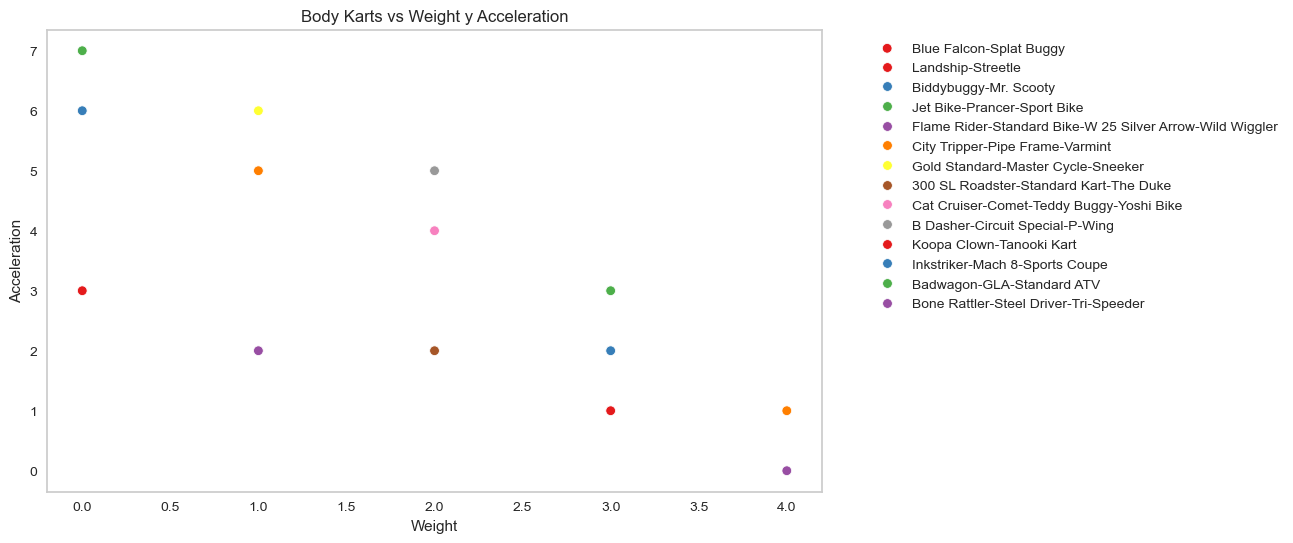

In [209]:
# Scatter plot de Body Karts vs Weight y Acceleration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bodies_grouped, x='Weight', y='Acceleration', hue='Body', palette='Set1')
plt.title('Body Karts vs Weight y Acceleration')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.legend(bodies_grouped['Body'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show() 



Se observa que la velocidad  y la tracción dependen del Body a utulizar

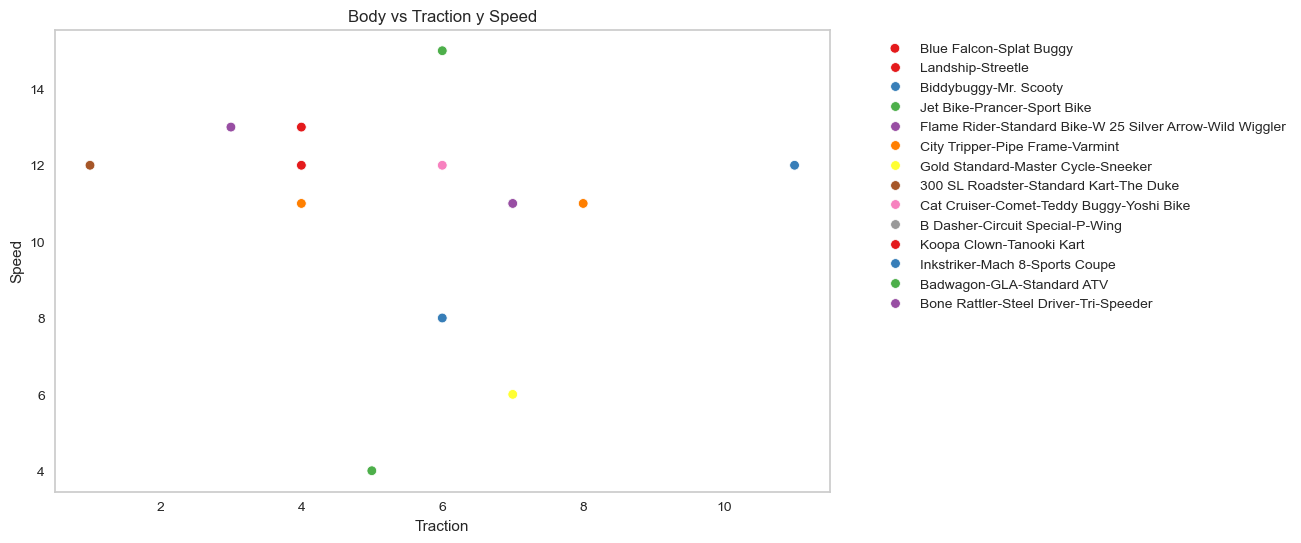

In [210]:
# Scatter plot de Body vs Traction y Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bodies_grouped, x='Traction', y='Speed', hue='Body', palette='Set1')
plt.title('Body vs Traction y Speed')
plt.xlabel('Traction')
plt.ylabel('Speed')
plt.legend(bodies_grouped['Body'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()



Aquí claramente hay una tendencia, mientras mayor sea el peso menor sera la maniobrabilidad

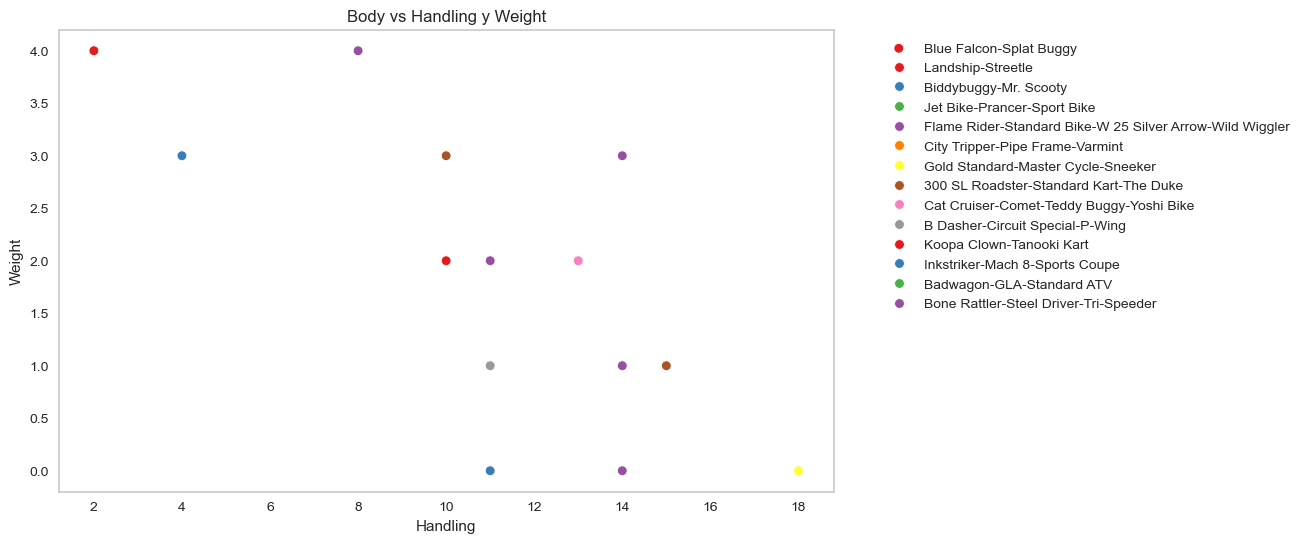

In [211]:


# scatter plot de Body vs la Handling con color por el peso
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bodies, x='Handling', y='Weight', hue='Body', palette='Set1')
plt.title('Body vs Handling y Weight')
plt.xlabel('Handling')
plt.ylabel('Weight')
plt.legend(bodies_grouped['Body'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [212]:
# Elimina la columna Driver
drivers_grouped = df_drivers.drop(columns=['Driver'])
# Elimina duplicados
drivers_grouped = drivers_grouped.drop_duplicates(subset=['Group'])
# Colocar la columna Group al principio
drivers_grouped = drivers_grouped[['Group'] + [col for col in drivers_grouped.columns if col != 'Group']]
# Cambiar el nombre de la columna Group a Driver
drivers_grouped = drivers_grouped.rename(columns={'Group': 'Driver'})
drivers_grouped

,Driver,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Baby Daisy-Baby Peach,0,4,5,8,0,40
2,Baby Rosalina-Lemmy,0,5,5,7,0,36
4,Baby Luigi-Baby Mario-Dry Bones,1,5,4,6,4,32
7,Bowser Jr.-Koopa Troopa-Lakitu,2,4,4,6,8,32
10,Isabelle-Toadette-Wendy,2,5,4,6,8,28
13,Cat Peach-Inkling Girl-Villager (female),3,4,3,5,16,24
16,Larry-Shy Guy-Toad,3,4,3,7,12,28
19,Daisy-Peach-Yoshi,4,3,3,6,20,20
22,Inkling Boy-Tanooki Mario-Villager (male),5,3,3,8,20,20
25,Ludwig-Mario-Mii (medium),6,2,2,6,24,16


Se puede ver que mientras más peso tenga el piloto menos maneobrabilidad se tendrá

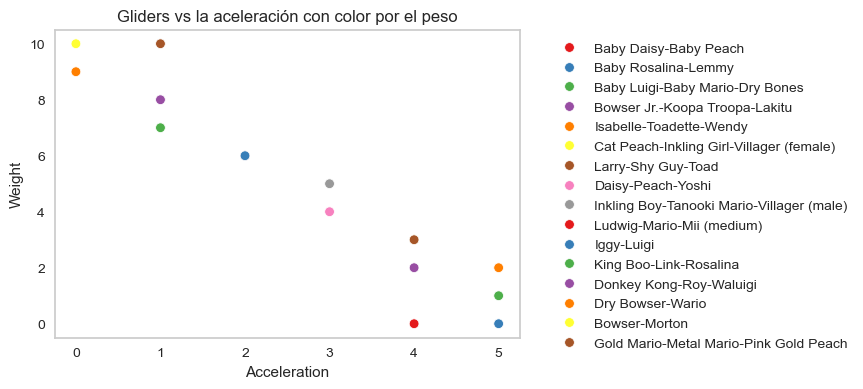

In [213]:
# Scatter plot de Driver vs la aceleración con color por el peso
plt.figure(figsize=(6, 4))
sns.scatterplot(data=drivers_grouped, x='Acceleration', y='Weight', hue='Driver', palette='Set1')
plt.title('Gliders vs la aceleración con color por el peso')
plt.xlabel('Acceleration')
plt.ylabel('Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


Se observa que dependiendo del personaje que se use se tendrá mas o menos tracción dependiendo de la velocidad, pero en general si se tiene más peso habrá menos tracción

Los mejores personajes aquí son los que se acercan a la esquina superior derecha

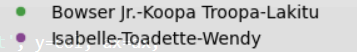

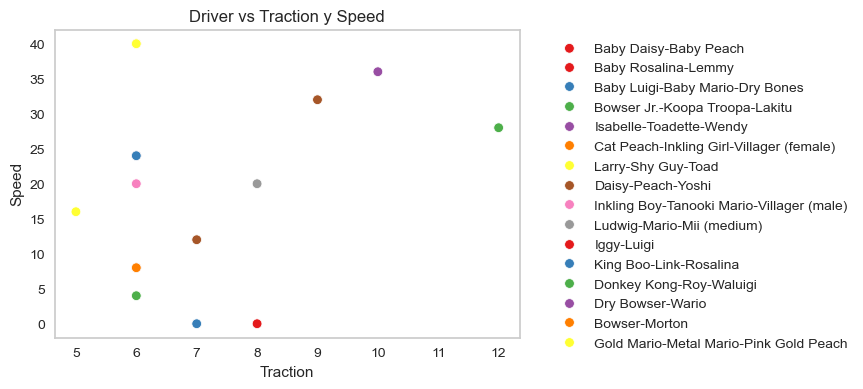

In [214]:

# Scatter plot de Body vs Traction y Speed
plt.figure(figsize=(6, 4))
sns.scatterplot(data=drivers_grouped, x='Traction', y='Speed', hue='Driver', palette='Set1')
plt.title('Driver vs Traction y Speed')
plt.xlabel('Traction')
plt.ylabel('Speed')
plt.legend(drivers_grouped['Driver'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()



Aquí se puede ver que entre más peso menos maneobrabilidad se tendrá 

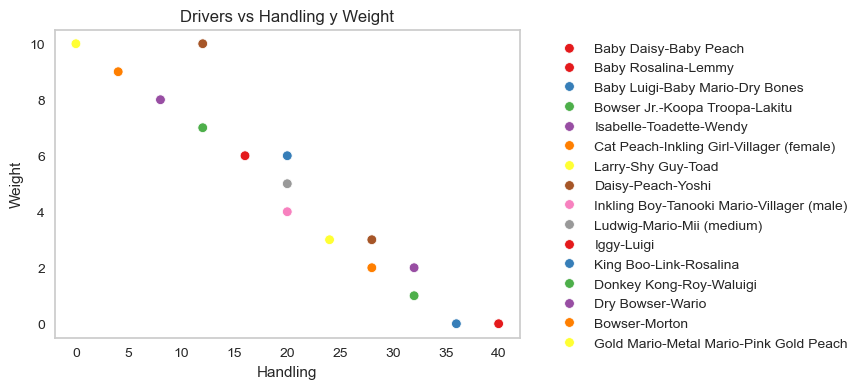

In [215]:
# scatter plot de Body vs la Handling con color por el peso
plt.figure(figsize=(6, 4))
sns.scatterplot(data=drivers_grouped, x='Handling', y='Weight', hue='Driver', palette='Set1')
plt.title('Drivers vs Handling y Weight')
plt.xlabel('Handling')
plt.ylabel('Weight')
plt.legend(drivers_grouped['Driver'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [216]:
# Elimina la columna Gliders
gliders_grouped = df_gliders.drop(columns=['Gliders'])
# Elimina duplicados
gliders_grouped = gliders_grouped.drop_duplicates(subset=['Group'])
# Colocar la columna Group al principio
gliders_grouped = gliders_grouped[['Group'] + [col for col in gliders_grouped.columns if col != 'Group']]
# Cambiar el nombre de la columna Group a Gliders
gliders_grouped = gliders_grouped.rename(columns={'Group': 'Gliders'})
gliders_grouped

,Gliders,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Cloud Glider-Flower Glider -Paper Glider-Para...,0,2,2,2,3,4
4,Hylian Kite-Super Glider-Waddle Wing,1,1,1,2,4,3
7,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol,1,2,2,2,2,4
11,Gold Glider-Plane Glider -Wario Wing,2,1,1,2,4,3


En las tres gráficas siguientes se puede ver, como primer acercamiento, que lo que importa es el tipo de glider que se esté usando por que en sí no se ve alguna tendencia clara de las características, sino que impacta directamente el glider usado.

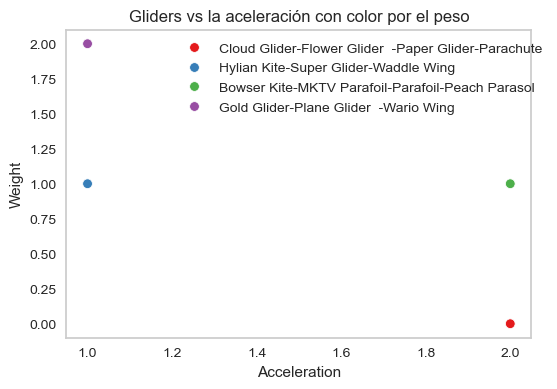

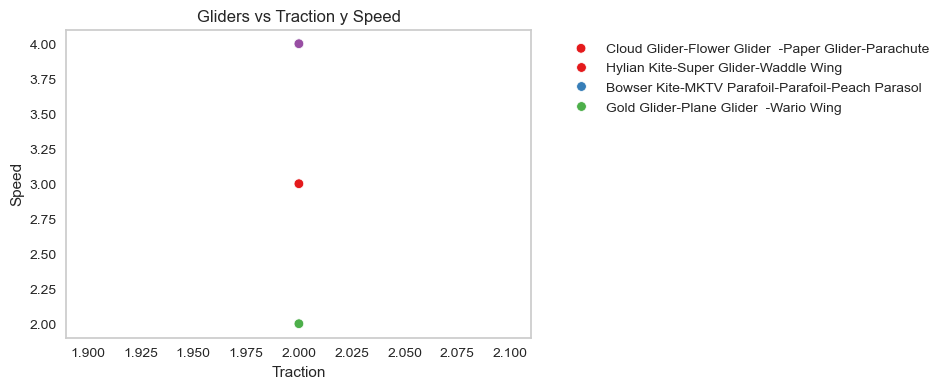

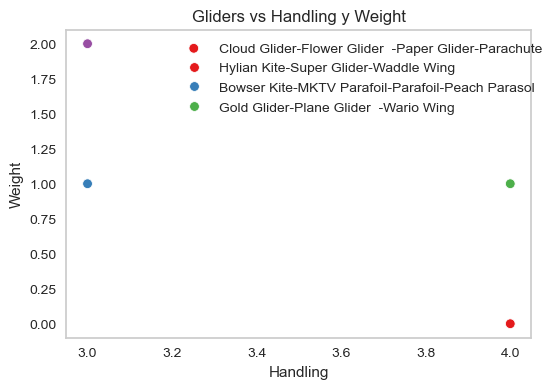

In [217]:
# Scatter plot de Gliders vs la aceleración con color por el peso
plt.figure(figsize=(6, 4))
sns.scatterplot(data=gliders_grouped, x='Acceleration', y='Weight', hue='Gliders', palette='Set1')
plt.title('Gliders vs la aceleración con color por el peso')
plt.xlabel('Acceleration')
plt.ylabel('Weight')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()
plt.show()

# Scatter plot de Body vs Traction y Speed
plt.figure(figsize=(6, 4))
sns.scatterplot(data=gliders_grouped, x='Traction', y='Speed', hue='Gliders', palette='Set1')
plt.title('Gliders vs Traction y Speed')
plt.xlabel('Traction')
plt.ylabel('Speed')
plt.legend(gliders_grouped['Gliders'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# scatter plot de Body vs la Handling con color por el peso
plt.figure(figsize=(6, 4))
sns.scatterplot(data=gliders_grouped, x='Handling', y='Weight', hue='Gliders', palette='Set1')
plt.title('Gliders vs Handling y Weight')
plt.xlabel('Handling')
plt.ylabel('Weight')
plt.legend(gliders_grouped['Gliders'].unique(), bbox_to_anchor=(1.05, 1))
plt.grid()
plt.show()




In [218]:
# Elimina la columna tires
tires_grouped = df_tires.drop(columns=['Tires'])
# Elimina duplicados
tires_grouped = tires_grouped.drop_duplicates(subset=['Group'])
# Colocar la columna Group al principio
tires_grouped = tires_grouped[['Group'] + [col for col in tires_grouped.columns if col != 'Group']]
# Cambiar el nombre de la columna Group a Tires
tires_grouped = tires_grouped.rename(columns={'Group': 'Tires'})
tires_grouped

,Tires,Weight,Acceleration,MiniTurbo,Traction,Speed,Handling
0,Button-Leaf Tires,0,5,5,4,7,12
2,Azure Roller-Roller,0,6,6,4,6,16
4,Cushion-Sponge,1,4,4,8,7,8
6,Crimson Slim-Slim-Wood,2,2,2,5,11,15
9,Blue Standard-GLA Tires-Standard,2,4,3,7,10,12
12,Cyber Slick-Slick,3,1,0,4,8,5
14,Off-Road-Retro Off-Road-Triforce Tires,3,3,1,9,10,6
17,Gold Tires-Metal,4,0,0,3,10,5
19,Hot Monster-Monster,4,2,2,10,7,2


Aquí se puede ve que en las llantas mientras más pesadas sean, menor es su aceleración

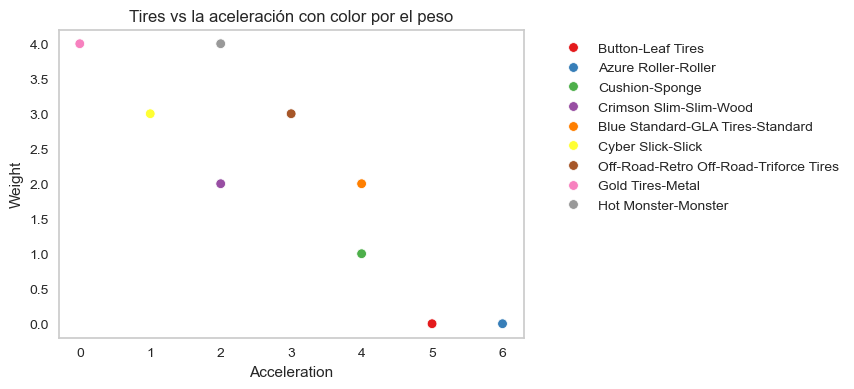

In [219]:
# Scatter plot de Tires vs la aceleración con color por el peso
plt.figure(figsize=(6, 4))
sns.scatterplot(data=tires_grouped, x='Acceleration', y='Weight', hue='Tires', palette='Set1')
plt.title('Tires vs la aceleración con color por el peso')
plt.xlabel('Acceleration')
plt.ylabel('Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()



Aquí se puede ver que los puntos están más disapersos y esto puede indicar que lo que afecta es el tipo de llanta no tanto el la tracción y velocidad

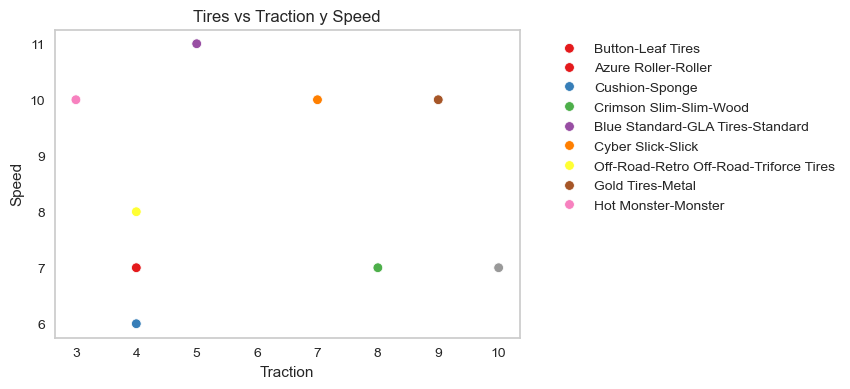

In [220]:
# Scatter plot de Body vs Traction y Speed
plt.figure(figsize=(6, 4))
sns.scatterplot(data=tires_grouped, x='Traction', y='Speed', hue='Tires', palette='Set1')
plt.title('Tires vs Traction y Speed')
plt.xlabel('Traction')
plt.ylabel('Speed')
plt.legend(tires_grouped['Tires'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


Se puede ver una tendencia que indica que entre más peso menor es la maniobrabilidad

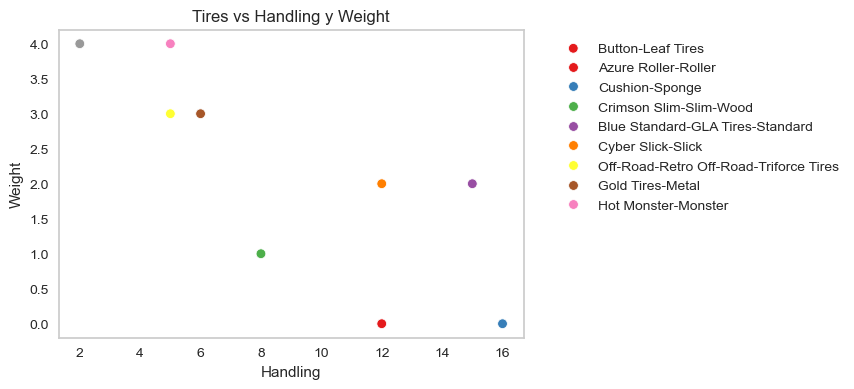

In [221]:

# scatter plot de Body vs la Handling con color por el peso
plt.figure(figsize=(6, 4))
sns.scatterplot(data=tires_grouped, x='Handling', y='Weight', hue='Tires', palette='Set1')
plt.title('Tires vs Handling y Weight')
plt.xlabel('Handling')
plt.ylabel('Weight')
plt.legend(tires_grouped['Tires'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [222]:
tires_g=tires_grouped.copy()
drivers_g=drivers_grouped.copy()
gliders_g=gliders_grouped.copy()
bodies_g=bodies_grouped.copy()


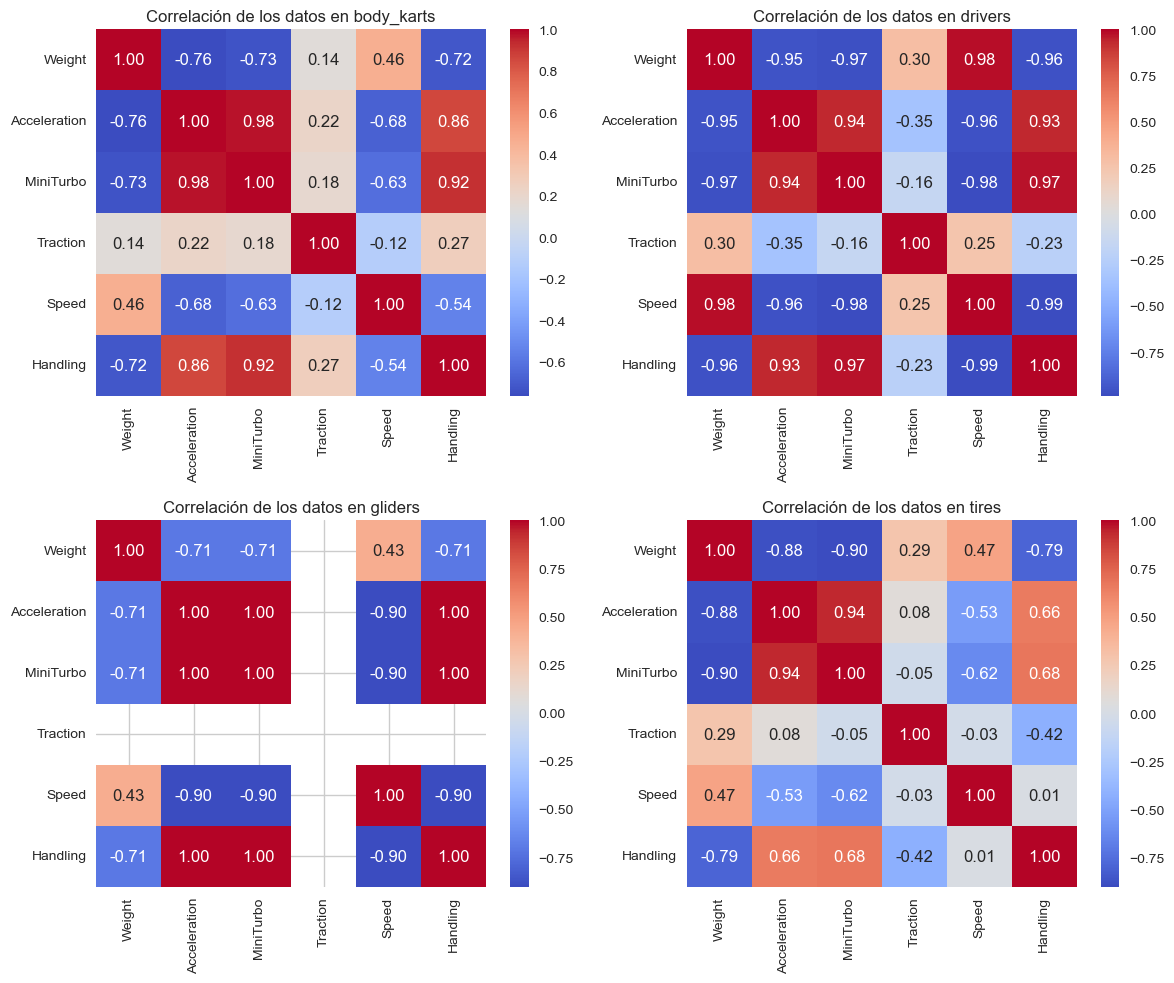

In [223]:
# Crear una figura con un cuadro 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Heatmap de la correlación de los datos en body_karts
numeric_cols = bodies_g.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 0])
axes[0, 0].set_title('Correlación de los datos en body_karts')

# Heatmap de la correlación de los datos en drivers
numeric_cols = drivers_g.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 1])
axes[0, 1].set_title('Correlación de los datos en drivers')

# Heatmap de la correlación de los datos en gliders
numeric_cols = gliders_g.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 0])
axes[1, 0].set_title('Correlación de los datos en gliders')

# Heatmap de la correlación de los datos en tires
numeric_cols = tires_g.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Correlación de los datos en tires')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Body
- Peso vs. Aceleración / MiniTurbo / Manejo: Los cuerpos más pesados ganan velocidad punta pero pierden aceleración, potencia de mini-turbo y capacidad de manejo -ALTA
- Peso vs. Velocidad: Mientras más peso exista  mayor será la velocidad máxima MODERADA
- Aceleración – MiniTurbo – Manejo: Quien optimiza aceleración casi siempre mejora mini-turbo y manejo ALTA
- Velocidad vs. Aceleración / MiniTurbo / Manejo: Aumentar la velocidad punta compromete las otras tres -MODERADA
- Tracción: INDEPENDIENTE

Drivers
  - Peso – Velocidad: FUERTE
  - Peso – Aceleración/MiniTurbo/Manejo: -FUERTE
  - Aceleración – MiniTurbo – Manejo: FUERTE
  - Velocidad - Aceleración/MiniTurbo/Manejo: -FUERTE
- Tracción: INDEPENDIENTE

Gliders
- Aceleración – MiniTurbo – PERFECTA
- Velocidad vs. Aceleración/MiniTurbo/Manejo: -FUERTE
- Peso vs. Aceleración/MiniTurbo/Manejo: -FUERTE
- Peso vs. Velocidad: MODERADA
- Tracción: NO HAY CORRELACIÓNES PORQUE SOLO HAY UN VALOR EN ESTA SECCIÓN

Tires
- Peso vs. Aceleración / MiniTurbo: -FUERTE
- Peso vs. Velocidad: MODERADA
- Aceleración vs. MiniTurbo: FUERTE
- Aceleración / MiniTurbo vs. Velocidad: -MODERADA
- Tracción: DEBIL

#### Combinación

In [224]:
import pandas as pd
from functools import reduce

# 1) Tus tablas agrupadas
dfs        = [bodies_g, drivers_g, gliders_g, tires_g]
name_cols  = ['Body', 'Driver', 'Gliders', 'Tires']
feature_cols = ['Weight','Acceleration','Traction','Speed','Handling','MiniTurbo']

# 2) Renombramos solo las columnas de características para evitar colisiones
renamed = []
for df, nm in zip(dfs, name_cols):
    tmp = df.copy()
    tmp = tmp.rename(columns={c: f"{c}_{nm}" for c in feature_cols})
    renamed.append(tmp)

# 3) Merge cruzado (cross-join) secuencial de las cuatro tablas
combined = reduce(lambda left, right: left.merge(right, how='cross'), renamed)

# 4) Sumamos cada característica de los cuatro orígenes
for feat in feature_cols:
    cols = [f"{feat}_{nm}" for nm in name_cols]
    combined[feat] = combined[cols].sum(axis=1)

# 5) (Opcional) Creamos una columna 'Combo' ordenada para identificar el set completo
combined['Combo'] = combined[name_cols].apply(lambda row: '-'.join(sorted(row)), axis=1)

# 6) Seleccionamos el output final incluyendo las cuatro columnas de nombre
df = combined[name_cols + ['Combo'] + feature_cols]

# Así ya ves, fila a fila, qué Body, Driver, Gliders y Tires componen cada combinación:
df


,Body,Driver,Gliders,Tires,Combo,Weight,Acceleration,Traction,Speed,Handling,MiniTurbo
0,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Button-Leaf Tires,Baby Daisy-Baby Peach-Blue Falcon-Splat Buggy-...,0,14,18,23,67,15
1,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Baby Daisy-Baby Peach-Blue...,0,15,18,22,71,16
2,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Cushion-Sponge,Baby Daisy-Baby Peach-Blue Falcon-Splat Buggy-...,1,13,22,23,63,14
3,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Crimson Slim-Slim-Wood,Baby Daisy-Baby Peach-Blue Falcon-Splat Buggy-...,2,11,19,27,70,12
4,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Blue Standard-GLA Tires-Standard,Baby Daisy-Baby Peach-Blue Falcon-Splat Buggy-...,2,13,21,26,67,13
...,...,...,...,...,...,...,...,...,...,...,...
8059,Bone Rattler-Steel Driver-Tri-Speeder,Gold Mario-Metal Mario-Pink Gold Peach,Gold Glider-Plane Glider -Wario Wing,Blue Standard-GLA Tires-Standard,Blue Standard-GLA Tires-Standard-Bone Rattler-...,18,7,22,57,35,7
8060,Bone Rattler-Steel Driver-Tri-Speeder,Gold Mario-Metal Mario-Pink Gold Peach,Gold Glider-Plane Glider -Wario Wing,Cyber Slick-Slick,Bone Rattler-Steel Driver-Tri-Speeder-Cyber Sl...,19,4,19,55,28,4
8061,Bone Rattler-Steel Driver-Tri-Speeder,Gold Mario-Metal Mario-Pink Gold Peach,Gold Glider-Plane Glider -Wario Wing,Off-Road-Retro Off-Road-Triforce Tires,Bone Rattler-Steel Driver-Tri-Speeder-Gold Gli...,19,6,24,57,29,5
8062,Bone Rattler-Steel Driver-Tri-Speeder,Gold Mario-Metal Mario-Pink Gold Peach,Gold Glider-Plane Glider -Wario Wing,Gold Tires-Metal,Bone Rattler-Steel Driver-Tri-Speeder-Gold Gli...,20,3,18,57,28,4


### Análisis Exploratorio de datos

In [225]:
df.describe()

,Weight,Acceleration,Traction,Speed,Handling,MiniTurbo
count,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000
mean,9.718254,10.607143,20.767857,41.980159,44.321429,10.394841
std,3.905111,3.300702,3.811727,13.463143,12.852510,3.204371
min,0.000000,1.000000,11.000000,12.000000,7.000000,1.000000
25%,7.000000,8.000000,18.000000,31.000000,35.000000,8.000000
50%,10.000000,11.000000,21.000000,42.000000,45.000000,10.000000
75%,13.000000,13.000000,23.000000,53.000000,54.000000,13.000000
max,20.000000,20.000000,35.000000,70.000000,78.000000,20.000000


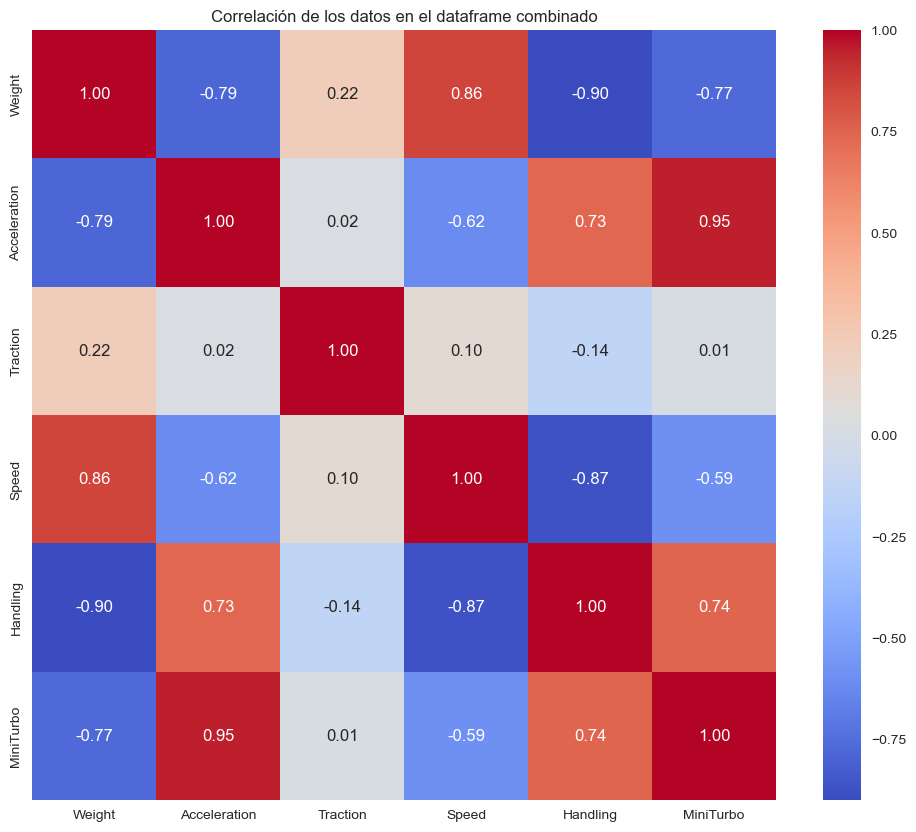

In [226]:
# Heatmap de la correlación de los datos en el dataframe combinado
plt.figure(figsize=(12, 10))

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlación de los datos en el dataframe combinado')
plt.show()


El peso parece afectar a las demás variables:


- Velocidad:  
A mayor peso, mayor velocidad máxima

- Aceleración:  
A mayor peso, peor es la aceleración

- Manejo:  
A mayor peso, peor capacidad de manejabilidad

- MiniTurbo:  
A mayor peso, menor ahorro de mini turbo

- Tracción:  
El peso apenas mejora un poco la tracción, el efecto es débil.

  
Los combos más pesados dan una máxima velocidad alta, pero penalizan tu salida (aceleración), tu manejo en curvas y la carga de mini-turbo, mientras que casi no cambian la tracción


Como el peso es una variable que penaliza a las otras, se podría tratar al peso como algo que se busca pero no en mayor medida como las otras variables, entonces se puede normalizar cada columna

In [227]:
from sklearn.preprocessing import MinMaxScaler
df1 = df.copy()
scaler = MinMaxScaler()
df1[['Weight_n','Acceleration_n','Speed_n',
    'Handling_n','MiniTurbo_n','Traction_n']] = scaler.fit_transform(
    df1[['Weight','Acceleration','Speed','Handling','MiniTurbo','Traction']])

df1.head(5)


,Body,Driver,Gliders,Tires,Combo,Weight,Acceleration,Traction,Speed,Handling,MiniTurbo,Weight_n,Acceleration_n,Speed_n,Handling_n,MiniTurbo_n,Traction_n
0,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Button-Leaf Tires,Baby Daisy-Baby Peach-Blue Falcon-Splat Buggy-...,0,14,18,23,67,15,0.00,0.684211,0.189655,0.845070,0.736842,0.291667
1,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Baby Daisy-Baby Peach-Blue...,0,15,18,22,71,16,0.00,0.736842,0.172414,0.901408,0.789474,0.291667
2,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Cushion-Sponge,Baby Daisy-Baby Peach-Blue Falcon-Splat Buggy-...,1,13,22,23,63,14,0.05,0.631579,0.189655,0.788732,0.684211,0.458333
3,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Crimson Slim-Slim-Wood,Baby Daisy-Baby Peach-Blue Falcon-Splat Buggy-...,2,11,19,27,70,12,0.10,0.526316,0.258621,0.887324,0.578947,0.333333
4,Blue Falcon-Splat Buggy,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Blue Standard-GLA Tires-Standard,Baby Daisy-Baby Peach-Blue Falcon-Splat Buggy-...,2,13,21,26,67,13,0.10,0.631579,0.241379,0.845070,0.631579,0.416667


In [228]:
w = {
'Weight_score': 0.20,
'Acceleration_n': 0.25,
'Speed_n':        0.25,
'Handling_n':     0.25,
'MiniTurbo_n':    0.03,
'Traction_n':     0.02
}



df1['stats'] = (
    w['Weight_score']* (1 - df1['Weight_n']) +
    w['Acceleration_n']* df1['Acceleration_n'] +
    w['Speed_n']       * df1['Speed_n'] +
    w['Handling_n']    * df1['Handling_n'] +
    w['MiniTurbo_n']   * df1['MiniTurbo_n'] +
    w['Traction_n']    * df1['Traction_n']
)


df1 = df1.sort_values(by='stats', ascending=False, ignore_index=True)
df1.head(10)


,Body,Driver,Gliders,Tires,Combo,Weight,Acceleration,Traction,Speed,Handling,MiniTurbo,Weight_n,Acceleration_n,Speed_n,Handling_n,MiniTurbo_n,Traction_n,stats
0,Biddybuggy-Mr. Scooty,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Baby Daisy-Baby Peach-Bidd...,0,19,19,13,78,20,0.00,0.947368,0.017241,1.000000,1.000000,0.333333,0.727819
1,Biddybuggy-Mr. Scooty,Baby Rosalina-Lemmy,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Baby Rosalina-Lemmy-Biddyb...,0,20,18,13,74,20,0.00,1.000000,0.017241,0.943662,1.000000,0.291667,0.726059
2,Landship-Streetle,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Baby Daisy-Baby Peach-Clou...,0,18,20,17,74,19,0.00,0.894737,0.086207,0.943662,0.947368,0.375000,0.717072
3,Biddybuggy-Mr. Scooty,Baby Luigi-Baby Mario-Dry Bones,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Baby Luigi-Baby Mario-Dry ...,1,20,17,17,70,19,0.05,1.000000,0.086207,0.887324,0.947368,0.250000,0.716804
4,Landship-Streetle,Baby Rosalina-Lemmy,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Baby Rosalina-Lemmy-Cloud ...,0,19,19,17,70,19,0.00,0.947368,0.086207,0.887324,0.947368,0.333333,0.715313
5,Biddybuggy-Mr. Scooty,Baby Daisy-Baby Peach,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol,Azure Roller-Roller,Azure Roller-Roller-Baby Daisy-Baby Peach-Bidd...,1,19,19,12,78,20,0.05,0.947368,0.000000,1.000000,1.000000,0.333333,0.713509
6,Biddybuggy-Mr. Scooty,Baby Rosalina-Lemmy,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol,Azure Roller-Roller,Azure Roller-Roller-Baby Rosalina-Lemmy-Biddyb...,1,20,18,12,74,20,0.05,1.000000,0.000000,0.943662,1.000000,0.291667,0.711749
7,Biddybuggy-Mr. Scooty,Bowser Jr.-Koopa Troopa-Lakitu,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Biddybuggy-Mr. Scooty-Bows...,2,19,17,21,70,19,0.10,0.947368,0.155172,0.887324,0.947368,0.250000,0.710887
8,Biddybuggy-Mr. Scooty,Isabelle-Toadette-Wendy,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Biddybuggy-Mr. Scooty-Clou...,2,20,17,21,66,19,0.10,1.000000,0.155172,0.830986,0.947368,0.250000,0.709961
9,Flame Rider-Standard Bike-W 25 Silver Arrow-Wi...,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,Azure Roller-Roller-Baby Daisy-Baby Peach-Clou...,1,17,22,20,74,18,0.05,0.842105,0.137931,0.943662,0.894737,0.458333,0.706933


In [229]:
df1.tail(10)

,Body,Driver,Gliders,Tires,Combo,Weight,Acceleration,Traction,Speed,Handling,MiniTurbo,Weight_n,Acceleration_n,Speed_n,Handling_n,MiniTurbo_n,Traction_n,stats
8054,Badwagon-GLA-Standard ATV,Bowser-Morton,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol,Hot Monster-Monster,Badwagon-GLA-Standard ATV-Bowser Kite-MKTV Par...,19,4,25,60,8,4,0.95,0.157895,0.827586,0.014085,0.157895,0.583333,0.276295
8055,Badwagon-GLA-Standard ATV,Bowser-Morton,Hylian Kite-Super Glider-Waddle Wing,Cyber Slick-Slick,Badwagon-GLA-Standard ATV-Bowser-Morton-Cyber ...,18,2,19,63,10,1,0.90,0.052632,0.879310,0.042254,0.000000,0.333333,0.270216
8056,Badwagon-GLA-Standard ATV,Gold Mario-Metal Mario-Pink Gold Peach,Gold Glider-Plane Glider -Wario Wing,Gold Tires-Metal,Badwagon-GLA-Standard ATV-Gold Glider-Plane Gl...,20,2,21,57,22,2,1.00,0.052632,0.775862,0.211268,0.052632,0.416667,0.269853
8057,Badwagon-GLA-Standard ATV,Dry Bowser-Wario,Gold Glider-Plane Glider -Wario Wing,Gold Tires-Metal,Badwagon-GLA-Standard ATV-Dry Bowser-Wario-Gol...,19,1,18,65,14,1,0.95,0.000000,0.913793,0.098592,0.000000,0.291667,0.268929
8058,Badwagon-GLA-Standard ATV,Bowser-Morton,Hylian Kite-Super Glider-Waddle Wing,Hot Monster-Monster,Badwagon-GLA-Standard ATV-Bowser-Morton-Hot Mo...,19,3,25,62,7,3,0.95,0.105263,0.862069,0.000000,0.105263,0.583333,0.266658
8059,Badwagon-GLA-Standard ATV,Bowser-Morton,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol,Gold Tires-Metal,Badwagon-GLA-Standard ATV-Bowser Kite-MKTV Par...,19,2,18,63,11,2,0.95,0.052632,0.879310,0.056338,0.052632,0.291667,0.264482
8060,Badwagon-GLA-Standard ATV,Bowser-Morton,Gold Glider-Plane Glider -Wario Wing,Cyber Slick-Slick,Badwagon-GLA-Standard ATV-Bowser-Morton-Cyber ...,19,2,19,63,10,1,0.95,0.052632,0.879310,0.042254,0.000000,0.333333,0.260216
8061,Badwagon-GLA-Standard ATV,Bowser-Morton,Gold Glider-Plane Glider -Wario Wing,Hot Monster-Monster,Badwagon-GLA-Standard ATV-Bowser-Morton-Gold G...,20,3,25,62,7,3,1.00,0.105263,0.862069,0.000000,0.105263,0.583333,0.256658
8062,Badwagon-GLA-Standard ATV,Bowser-Morton,Hylian Kite-Super Glider-Waddle Wing,Gold Tires-Metal,Badwagon-GLA-Standard ATV-Bowser-Morton-Gold T...,19,1,18,65,10,1,0.95,0.000000,0.913793,0.042254,0.000000,0.291667,0.254845
8063,Badwagon-GLA-Standard ATV,Bowser-Morton,Gold Glider-Plane Glider -Wario Wing,Gold Tires-Metal,Badwagon-GLA-Standard ATV-Bowser-Morton-Gold G...,20,1,18,65,10,1,1.00,0.000000,0.913793,0.042254,0.000000,0.291667,0.244845


## Primeras sugerencias 

Gracias a los stats se puede ver, de primera estancia lo siguiente:

El mejor combo es el siguiente:
- Azure Roller-Roller 
- Baby Daisy-Baby Peach-Biddybuggy-Mr. Scooty
- Cloud Glider-Flower Glider  
- Paper Glider-Parachute

El peor combo es el siguiente:
- Badwagon-GLA-Standard ATV
- Bowser-Morton
- Gold Glider-Plane Glider -Wario Wing 
-Gold Tires-Metal


In [230]:
df2 = df1.copy()
df2 = df2.drop(columns=['Combo'])
df2 = df2.drop(columns=['Weight_n','Acceleration_n','Speed_n',
                        'Handling_n','MiniTurbo_n','Traction_n'])
df2.head(5)

,Body,Driver,Gliders,Tires,Weight,Acceleration,Traction,Speed,Handling,MiniTurbo,stats
0,Biddybuggy-Mr. Scooty,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,0,19,19,13,78,20,0.727819
1,Biddybuggy-Mr. Scooty,Baby Rosalina-Lemmy,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,0,20,18,13,74,20,0.726059
2,Landship-Streetle,Baby Daisy-Baby Peach,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,0,18,20,17,74,19,0.717072
3,Biddybuggy-Mr. Scooty,Baby Luigi-Baby Mario-Dry Bones,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,1,20,17,17,70,19,0.716804
4,Landship-Streetle,Baby Rosalina-Lemmy,Cloud Glider-Flower Glider -Paper Glider-Para...,Azure Roller-Roller,0,19,19,17,70,19,0.715313


In [231]:
df2.tail(5)

,Body,Driver,Gliders,Tires,Weight,Acceleration,Traction,Speed,Handling,MiniTurbo,stats
8059,Badwagon-GLA-Standard ATV,Bowser-Morton,Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol,Gold Tires-Metal,19,2,18,63,11,2,0.264482
8060,Badwagon-GLA-Standard ATV,Bowser-Morton,Gold Glider-Plane Glider -Wario Wing,Cyber Slick-Slick,19,2,19,63,10,1,0.260216
8061,Badwagon-GLA-Standard ATV,Bowser-Morton,Gold Glider-Plane Glider -Wario Wing,Hot Monster-Monster,20,3,25,62,7,3,0.256658
8062,Badwagon-GLA-Standard ATV,Bowser-Morton,Hylian Kite-Super Glider-Waddle Wing,Gold Tires-Metal,19,1,18,65,10,1,0.254845
8063,Badwagon-GLA-Standard ATV,Bowser-Morton,Gold Glider-Plane Glider -Wario Wing,Gold Tires-Metal,20,1,18,65,10,1,0.244845


# Clusterización de los datos




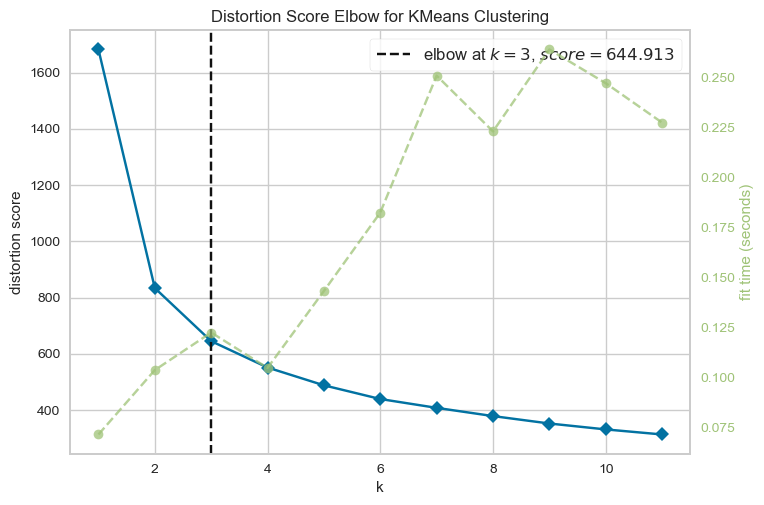

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [232]:
# Generate synthetic dataset with 8 random clusters
# Select only numerical columns for clustering
numerical_columns = ['Weight_n', 'Acceleration_n', 'Traction_n', 'Speed_n', 'Handling_n', 'MiniTurbo_n']
X = df1[numerical_columns].values

km = KMeans(n_clusters=8, random_state=42, n_init=10)

visualizer = KElbowVisualizer(km, k=(1, 12),metric='distortion')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Como se puede observar, el número de clústeres que mejor podría funcionar es de 3, es decir cuando k=3 y la distorición es menor puesto que eso indica que los clústeres son menos dispersos

In [233]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df1[numerical_columns].columns,
    index   = [f'PC{i+1}' for i in range(modelo_pca.components_.shape[0])])

,Weight_n,Acceleration_n,Traction_n,Speed_n,Handling_n,MiniTurbo_n
PC1,0.468670,-0.439356,0.060189,0.425642,-0.460400,-0.436524
PC2,0.131684,0.218942,0.936482,0.087585,-0.072245,0.211742
PC3,0.119818,0.461007,-0.313513,0.593426,-0.279306,0.494631
PC4,0.168759,-0.272428,0.034108,0.493604,0.802120,0.095391
PC5,0.844210,0.129641,-0.140824,-0.445996,0.124191,0.190618
PC6,-0.086495,-0.674893,0.009647,-0.128242,-0.214433,0.688852


Entonces podemos ver que el primer componente principal (PC1) tiene una alta correlación con la velocidad, la aceleración y el manejo, mientras que el segundo componente principal (PC2) tiene una alta correlación con el peso y la tracción

Esto sugiere que los primeros dos componentes principales capturan la mayor parte de la varianza en los datos y son buenos candidatos para la reducción de dimensionalidad

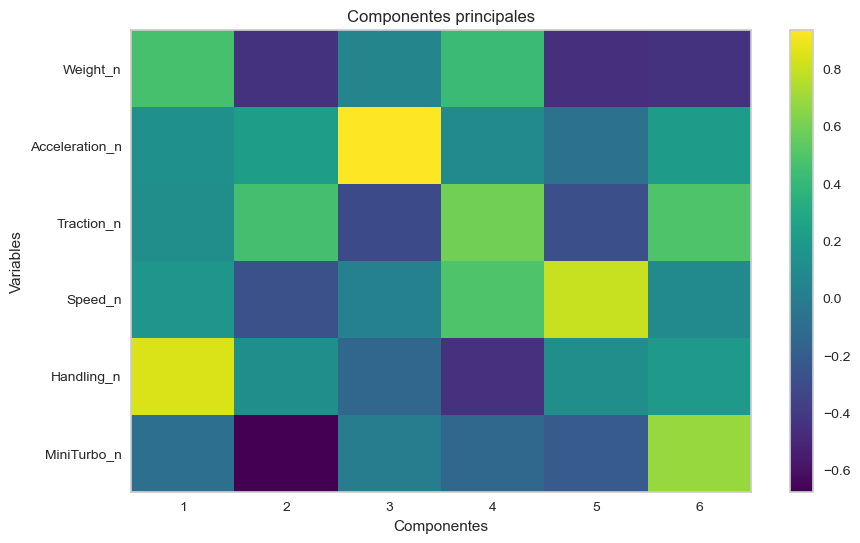

In [234]:
# Visualización de los componentes principales
plt.figure(figsize=(10, 6))
plt.title('Componentes principales')
plt.xlabel('Componentes')
plt.ylabel('Variables')
plt.imshow(modelo_pca.components_, cmap='viridis', aspect='auto')
plt.yticks(range(len(df1[numerical_columns].columns)), df1[numerical_columns].columns)
plt.xticks(range(len(df1[numerical_columns].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()
plt.show()


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.69099048 0.17637635 0.09343687 0.01776374 0.01392962 0.00750295]


Text(0, 0.5, 'Por. varianza explicada')

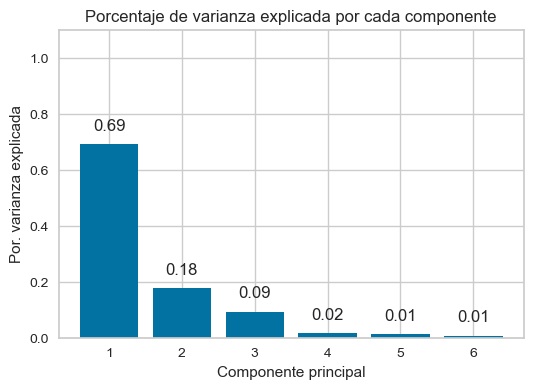

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df1[numerical_columns].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

En este caso, la primera componente explica el 69% de la varianza observada en los datos y la segunda el 17.64%

Las dos últimas componentes no superan por separado el 1% de varianza explicada

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.69099048 0.86736683 0.96080369 0.97856743 0.99249705 1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

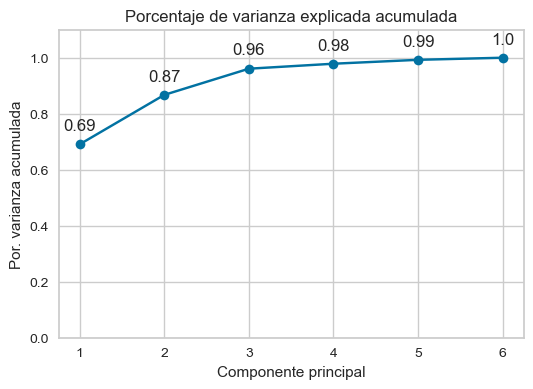

In [236]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df1[numerical_columns])) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada

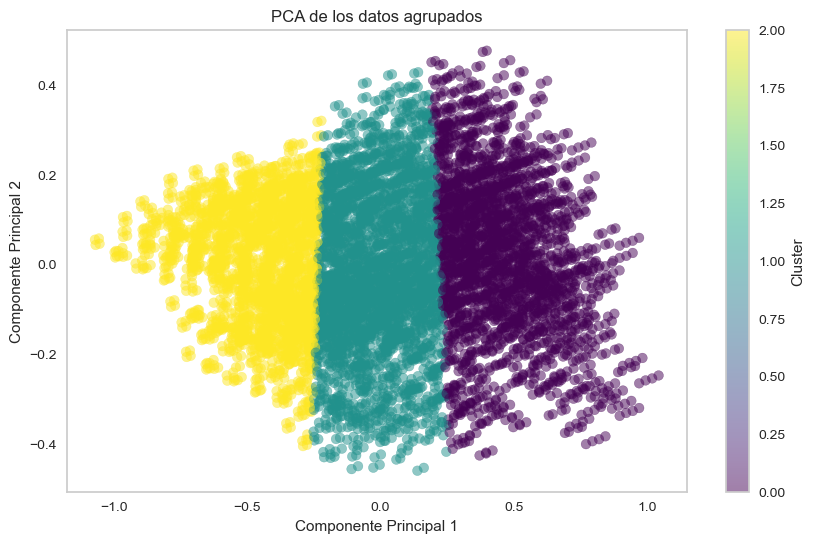

In [237]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df1['Cluster'] = clusters
df1['PCA1'] = X_pca[:, 0]
df1['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df1['PCA1'], df1['PCA2'], c=df1['Cluster'], cmap='viridis', alpha=0.5)
plt.title('PCA de los datos agrupados')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()



Aquí se pueden visualizar con bastante definición los clústeres

In [238]:
for feat, loading in zip(df1[numerical_columns], pca.components_[0]):
    print(f"{feat}: {loading:.3f}")


Weight_n: 0.481
Acceleration_n: -0.382
Traction_n: 0.051
Speed_n: 0.540
Handling_n: -0.440
MiniTurbo_n: -0.367


Aqui se puede ver como los atributos influten en el resultado de la PCA, lo que indica que el peso tiene el 50% de la influencia de la PCA, mientras que la Traction tiene a penas un 5% de influencia

In [239]:
# Define feature_names based on the numerical columns used in clustering
feature_names = numerical_columns

for i, centro in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}:")
    print(dict(zip(feature_names, centro)))


Cluster 0:
{'Weight_n': np.float64(0.46171015377299096), 'Acceleration_n': np.float64(0.021242676384624192)}
Cluster 1:
{'Weight_n': np.float64(-0.01400057892903624), 'Acceleration_n': np.float64(-0.018298061671251645)}
Cluster 2:
{'Weight_n': np.float64(-0.4571172396338805), 'Acceleration_n': np.float64(0.0021316255430548917)}


In [240]:
import numpy as np
import pandas as pd

# Combo más cercano a cada centroide
closest = []
for i, centro in enumerate(kmeans.cluster_centers_):
    # Filtra sólo las filas que pertenecen al cluster i
    df_i = df1[df1['Cluster'] == i].copy()
    
    # Matriz de coordenadas PCA de ese cluster
    coords = df_i[['PCA1','PCA2']].values
    
    # Calcula distancias euclídeas punto a punto al centroide
    dists = np.linalg.norm(coords - centro, axis=1)
    
    # Encuentra el índice (dentro de df_i) de la distancia mínima
    idx_min = dists.argmin()
    
    closest.append({
        'Cluster':    i,
        'PCA1_centroide': centro[0],
        'PCA2_centroide': centro[1],
        'Combo_cercano':  df_i.iloc[idx_min]['Combo'],
        'Distancia':      dists.min()
    })

centroides_cercanos = pd.DataFrame(closest).sort_values('Cluster').reset_index(drop=True)

print(centroides_cercanos)



   Cluster  PCA1_centroide  PCA2_centroide  \
0        0        0.461710        0.021243   
1        1       -0.014001       -0.018298   
2        2       -0.457117        0.002132   

                                       Combo_cercano  Distancia  
0  300 SL Roadster-Standard Kart-The Duke-Gold Ti...   0.001793  
1  Badwagon-GLA-Standard ATV-Cat Peach-Inkling Gi...   0.007552  
2  Biddybuggy-Mr. Scooty-Button-Leaf Tires-Daisy-...   0.000063  


### Segunda sugerencia

Lo que se realizó aquí fue la búsqueda de los combos con las coordenadas más cercanas al centroide de los clústeres que es en donde as estadísticas son mayores

Los combos más cercanos a cada centroide de cada clúster son:

- 300 SL Roadster-Standard Kart-The Duke-Gold Tires-Metal-Hylian Kite-Super Glider-Waddle Wing-King Boo-Link-Rosalina

- Badwagon-GLA-Standard ATV-Cat Peach-Inkling Girl-Villager (female)-Cloud Glider-Flower Glider -Paper Glider-Parachute-Cushion-Sponge

- Biddybuggy-Mr. Scooty-Button-Leaf Tires-Daisy-Peach-Yoshi-Hylian Kite-Super Glider-Waddle Wing

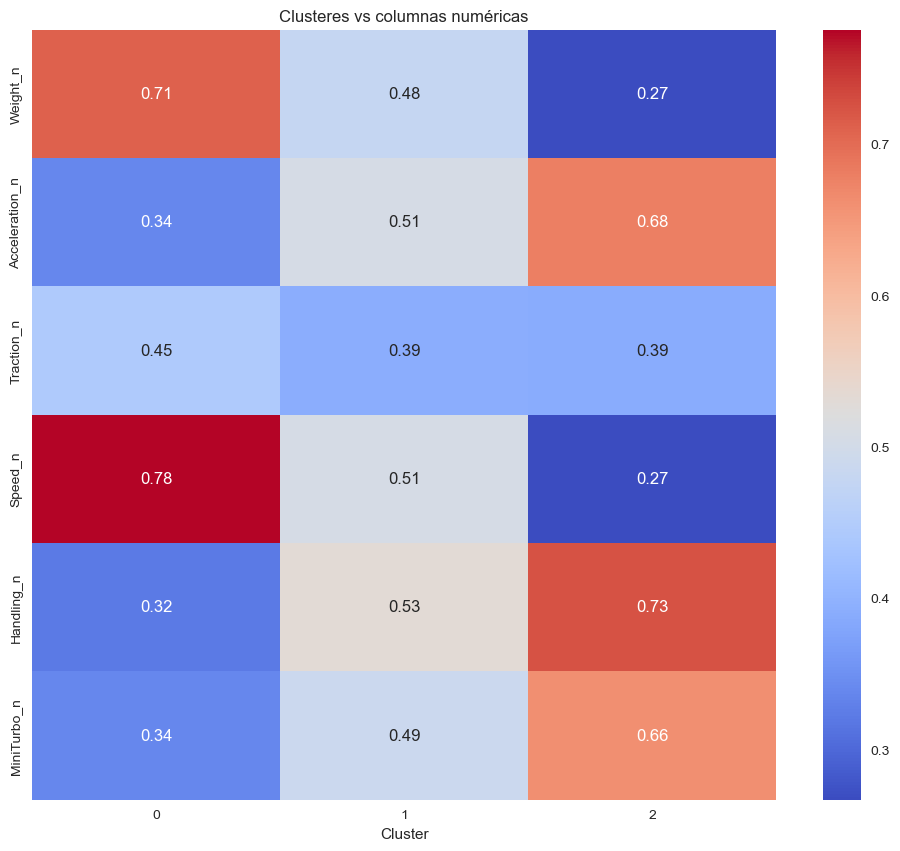

In [241]:
# Heatmap de clusteres vs numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(
    df1.groupby('Cluster')[numerical_columns].mean().T,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Clusteres vs columnas numéricas')
plt.show()



- Tracción_n: no es un factor diferenciador fuerte aquí
- Cluster 0: enfatiza velocidad
- Cluster 2: manejo, aceleración, mini-turbo  
- Cluster 1: captura todo en la zona media

Con esta caracterización se puede decir que  por ejemplo, si un jugador busca:
- Priorizar la velocidad -> cluster 0  
- Quienes busquen equlibrio -> cluster 1 
- Y los que necesiten maniobrabilidad -> cluster 2

# Topología

In [242]:
import kmapper as km
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Prepara tu matriz X normalizada
numerical_columns = ['Weight_n','Acceleration_n','Traction_n', 'Speed_n','Handling_n','MiniTurbo_n']
X = df1[numerical_columns].values
X_scaled = StandardScaler().fit_transform(X)

# Configura KeplerMapper
mapper = km.KeplerMapper(verbose=1)

#Define tu lens: aquí uso PCA a dos dimensiones
pca = PCA(n_components=3)
lens = pca.fit_transform(X)

#Construye el grafo Mapper
graph = mapper.map(
    lens,                   
    X_scaled,                 
    cover=km.Cover(n_cubes=28 ,  
    perc_overlap=0.2), 
    clusterer=DBSCAN(eps=0.8, min_samples=12))
custom_tooltips = df1['Combo'].values  # np.array(df1['Combo'].tolist())
mapper.visualize(
    graph,
    path_html="mapper_mario_kart.html",
    title="Mapper de Combos de Mario Kart",
    custom_tooltips=df1['stats'].values)

KeplerMapper(verbose=1)
Mapping on data shaped (8064, 6) using lens shaped (8064, 3)

Creating 21952 hypercubes.

Created 131 edges and 65 nodes in 0:00:02.581240.
Wrote visualization to: mapper_mario_kart.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper de Combos de Mario Kart | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13

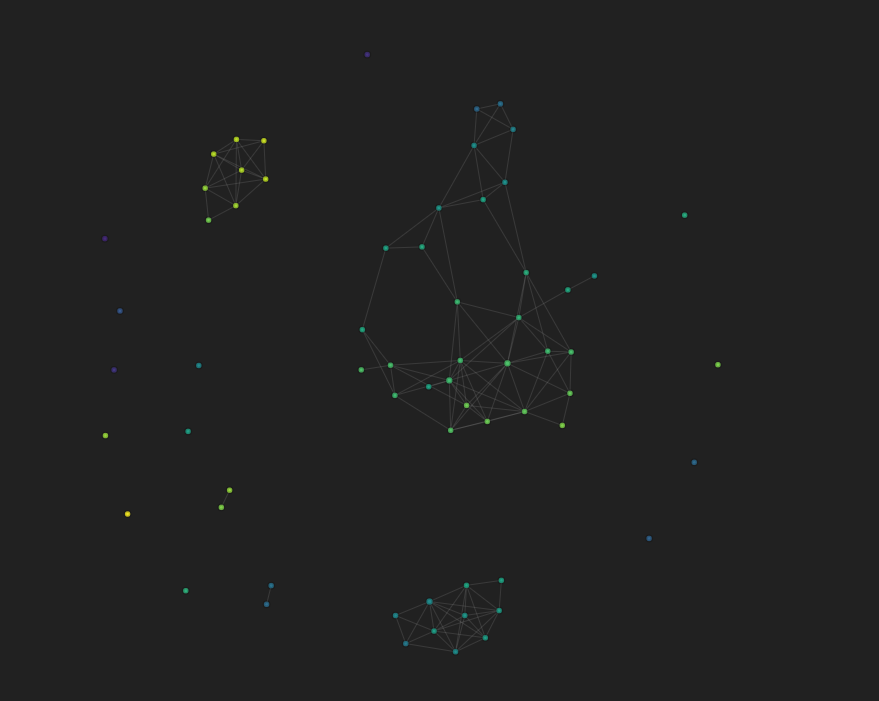

Es bastante interesante como el número de clústeres llegó a coincidir con la gráfica mostrasa en la sección de clusterización, eso puede indicar que los resultados han sido coherentes, porque, incluso en la clusterización había puntos un poco dispersos lo que se ve reflejado en los puntos que están sueltos alrededor de las figuras con mayores conexiones

In [243]:
#%pip install networkx

Top 10 nodos con mayor número de conexiones:
Nodo: cube2993_cluster0, Grado: 12
Nodo: cube3005_cluster0, Grado: 11
Nodo: cube3004_cluster0, Grado: 10
Nodo: cube3283_cluster0, Grado: 10
Nodo: cube1494_cluster0, Grado: 8
Nodo: cube1495_cluster0, Grado: 8
Nodo: cube2705_cluster0, Grado: 8
Nodo: cube1513_cluster0, Grado: 7
Nodo: cube1805_cluster0, Grado: 7
Nodo: cube1806_cluster0, Grado: 7


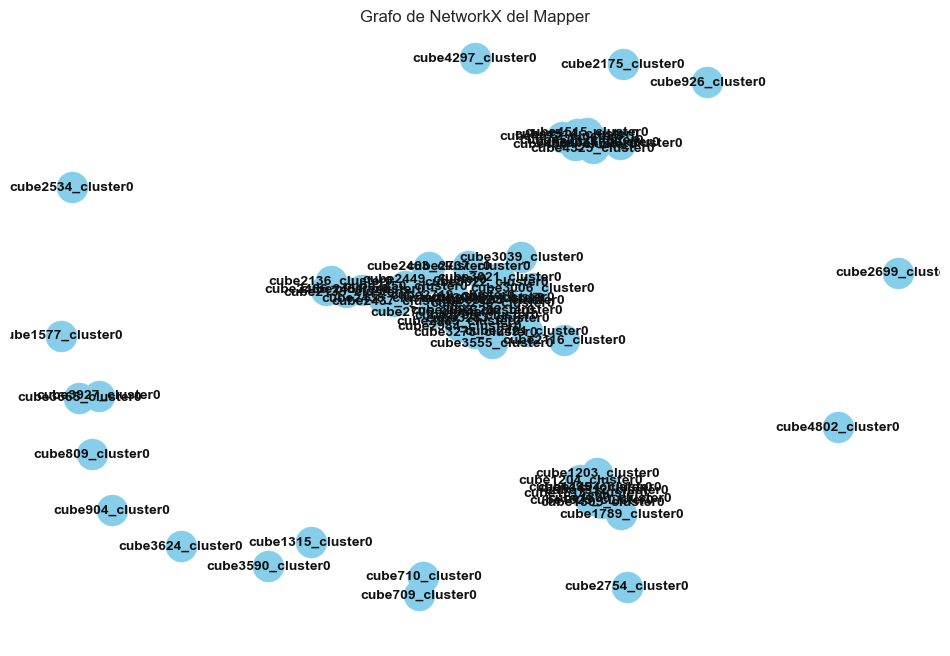

In [244]:
# Encontrar los nodos con mayor número de conexiones
# ==============================================================================
import networkx as nx
import matplotlib.pyplot as plt

# Convertir el grafo Mapper a un grafo de NetworkX
G = nx.Graph()

# Agregar nodos al grafo
for node in graph['nodes']:
    G.add_node(node)

# Agregar enlaces al grafo
for node, neighbors in graph['links'].items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Calcular el grado de cada nodo
node_degrees = dict(G.degree())
# Ordenar los nodos por su grado (número de conexiones)
sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)
# Obtener los 10 nodos con mayor número de conexiones
top_10_nodes = sorted_nodes[:10]
print("Top 10 nodos con mayor número de conexiones:")
for node, degree in top_10_nodes:
    print(f"Nodo: {node}, Grado: {degree}")

# Graficar el grafo de NetworkX
plt.figure(figsize=(12, 8))
plt.title("Grafo de NetworkX del Mapper")
nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()


Con el objetivo de tratar de mejorar la asignación de los colores en el gráfico Mapper, se determinó usr el promedio de los valores de stats, sin embargo como puede verse más abajo no tuvo un resultado muy drástico, casi es inperceptible

In [245]:
mapper.visualize(
    graph,
    path_html="Mapper_mario_kart_colored.html",
    title="Mapper coloreado por stats",
    custom_tooltips = df1['Combo'].values,
    # Paso 1: asegúrate de que color_values sea 2D
    color_values   = df1['stats'].values.reshape(-1, 1),
    # Paso 2: dale un nombre a esa columna de color
    color_function_name = ["stats"],
    node_color_function = "mean"    # función para agregar dentro de cada nodo
)



Wrote visualization to: Mapper_mario_kart_colored.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper coloreado por stats | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\

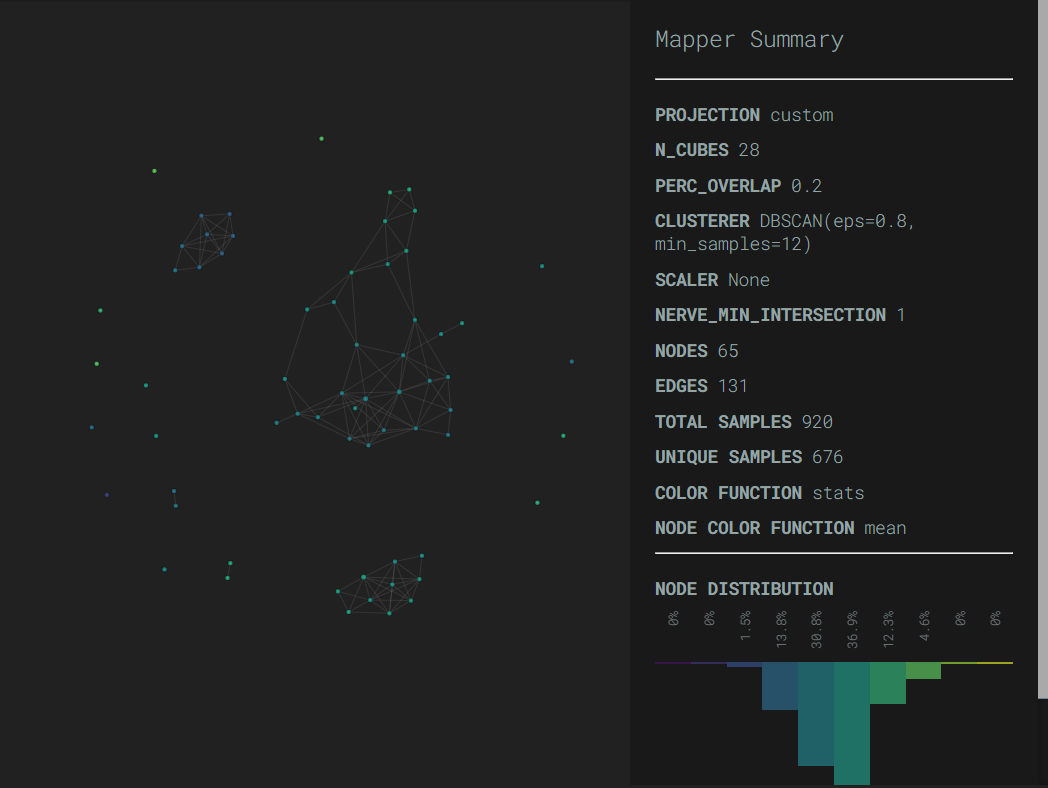

## Tercera Sugerencia

In [246]:
import numpy as np
import pandas as pd

# Construye un listado (nodo, media_stats, miembros)
node_info = []
for nodo, miembros in graph['nodes'].items():
    medias = df1.loc[miembros, 'stats'].mean()
    node_info.append((nodo, medias, miembros))

# Ordena por media_stats descendente
node_info = sorted(node_info, key=lambda x: x[1], reverse=True)

# Imprime los 5 nodos de mejor media y algunos combos de cada uno
for nodo, media, miembros in node_info[:5]:
    combos = df1.loc[miembros, 'Combo'].value_counts().index.tolist()
    print(f"\nNodo {nodo} — media stats = {media:.3f}")
    print("Combos:", combos[:5])
# guardar los mejores combos en una lista
mejores_combos = []
for nodo, media, miembros in node_info[:5]:
    combos = df1.loc[miembros, 'Combo'].value_counts().index.tolist()
    mejores_combos.append(combos[:5])




Nodo cube1315_cluster0 — media stats = 0.611
Combos: ['Azure Roller-Roller-Daisy-Peach-Yoshi-Flame Rider-Standard Bike-W 25 Silver Arrow-Wild Wiggler-Gold Glider-Plane Glider  -Wario Wing ', 'Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol-Button-Leaf Tires-Daisy-Peach-Yoshi-Flame Rider-Standard Bike-W 25 Silver Arrow-Wild Wiggler', '300 SL Roadster-Standard Kart-The Duke-Azure Roller-Roller-Cloud Glider-Flower Glider  -Paper Glider-Parachute-Inkling Boy-Tanooki Mario-Villager (male)', 'Azure Roller-Roller-City Tripper-Pipe Frame-Varmint-Hylian Kite-Super Glider-Waddle Wing-Iggy-Luigi', 'Bowser Kite-MKTV Parafoil-Parafoil-Peach Parasol-Button-Leaf Tires-Cat Cruiser-Comet-Teddy Buggy-Yoshi Bike-Daisy-Peach-Yoshi']

Nodo cube809_cluster0 — media stats = 0.602
Combos: ['Blue Standard-GLA Tires-Standard-Bowser Jr.-Koopa Troopa-Lakitu-Flame Rider-Standard Bike-W 25 Silver Arrow-Wild Wiggler-Hylian Kite-Super Glider-Waddle Wing', 'Biddybuggy-Mr. Scooty-Cloud Glider-Flower Glider  -Paper Gl

Estos son los mejores combos de cada nodo, que se calcularon a través de la media de stats determinada por el gráfico Mapper lo cual fue un proceso de agrupamiento 

# Referencias

- Dorothyynwong. (2022, 18 abril). Mario Kart 8 Delux data analysis. Kaggle. https://www.kaggle.com/code/dorothyynwong/mario-kart-8-delux-data-analysis?scriptVersionId=93354547

- Learn Statistics Easily. (2024, 25 julio). Qué es: Modelo de suma ponderada: APRENDA ESTADÍSTICAS FÁCILMENTE. LEARN STATISTICS EASILY. https://es.statisticseasily.com/glossario/what-is-weighted-sum-model

- Shaibu, S. (2024, noviembre 6). Python bar plot: Master basic and more advanced techniques. DataCamp. https://www.datacamp.com/tutorial/python-bar-plot 

- W3Schools. (n.d.). Python machine learning – K-means. Recuperado el 1 de mayo de 2025, de https://www.w3schools.com/python/python_ml_k-means.asp

- Amat Rodrigo, J. (2020, diciembre). PCA con Python. Ciencia de Datos. https://cienciadedatos.net/documentos/py19-pca-python   

- Sharma, A. (2024, febrero 14). Tutorial de análisis de componentes principales (ACP) en Python. DataCamp. https://www.datacamp.com/es/tutorial/principal-component-analysis-in-python 

- GeeksforGeeks. (2025, marzo 28). Abstract data types. https://www.geeksforgeeks.org/abstract-data-types/

- Yellowbrick Developers. (n.d.). Elbow method — Yellowbrick v1.5 documentation. Recuperado el 1 de mayo de 2025, de https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

- Tomar, A., & Whitfield, B. (2025, marzo 13). Elbow method in K-means clustering: Definition, drawbacks, vs. Silhouette score. Built In. https://builtin.com/data-science/elbow-method 

